# Exploratory Data Analysis

### Listings

Price and Ratings are the two dependent variables we want to predict. We will explore these variables to provide a better understanding of the dataset, their distributions, and their relationship's with multiple varibales

[Features](#features)
* [Numerical](#numerical)
* [Amenities](#amenities)


[Price](#price)
* [Bedrooms / Bathrooms & Accommodates / Beds](#bbab)
* [Property Type / Room Type / Bed Type](#prb)
* [Neighbourhood](#neighbourhood)
* [Instant Bookable / Business Travel Ready](#ibbtr)


[Ratings](#rating)
* [Neighbourhood](#neighbourhood_r)
* [Bedrooms / Bathrooms / Beds / Accommodates](#bbba_r)
* [Property Type / Room Type / Bed Type](#prb_r)
* [Instant Bookable / Business Travel Ready](#ibbtr_r)

[Price & Rating](#priceandrating)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
pd.set_option('display.float_format', '{:.4f}'.format)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
sns.set()

In [2]:
listings = pd.read_csv('listings_clean.csv', encoding = "utf-8", low_memory=False)

In [3]:
listings.head(5)

,Unnamed: 0,id,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_square_feet,has_weekly_price,has_monthly_price,days_since_calendar_updated,host_since_days,first_review_days,last_review_days,house_rules_len,average_len,Unnamed: 47,smooth pathway to front door,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Bathtub,Bathtub with shower chair,Beach essentials,Beachfront,Bed linens,Breakfast,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Family/kid friendly,Fire extinguisher,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower & toilet,Flat,Free parking on premises,Game console,Garden or backyard,Ground floor access,Gym,Hair dryer,Handheld shower head,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Hot water kettle,Indoor fireplace,Internet,Iron,Keypad,Kitchen,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Other pet(s),Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Patio or balcony,Pets allowed,Pets live on this property,Pocket wifi,Pool,Private bathroom,Private entrance,Private living room,Refrigerator,Roll-in shower with chair,Room-darkening shades,Safety card,Self Check-In,Shampoo,Single level home,Smart lock,Smoke detector,Smoking allowed,Stair gates,Step-free access,Stove,Suitable for events,TV,Table corner guards,Washer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower & toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,total_child_care_amenities,total_handicap_amenities
0,0,16570521,within an hour,False,True,True,Seacliff,94121,House,Private room,2,1.0000,1.0000,1.0000,Real Bed,"['TV', 'Wireless Internet', 'Indoor fireplace'...",120.0000,150.0000,35.0000,1,0.0000,4,14,15,95.0000,10.0000,10.0000,9.0000,9.0000,10.0000,10.0000,False,False,moderate,False,False,2,2.0200,False,False,False,21,1114,222,28,586.0000,417.3636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,15664146,within an hour,False,True,False,Seacliff,94121,Apartment,Entire home/apt,7,2.0000,3.0000,5.0000,Real Bed,"['TV', 'Cable TV', 'Internet', 'Wireless Inter...",295.0000,500.0000,150.0000,3,20.0000,2,18,40,92.0000,10.0000,10.0000,10.0000,10.0000,9.0000,9.0000,True,True,strict,False,False,1,3.8600,False,False,False,21,343,310,18,50.0000,108.3636,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0
2,2,1427660,within an hour,True,True,True,Seacliff,94121,House,Entire home/apt,2,1.0000,1.0000,1.0000,Real Bed,"['TV', 'Cable TV', 'Interne

In [4]:
# Delete old index
del listings['Unnamed: 0']

In [5]:
ids = ['id','host_id'] 

numerical = ['accommodates', 'bathrooms', 'bedrooms', 'beds','price','security_deposit','cleaning_fee','guests_included',
             'total_handicap_amenities','total_child_care_amenities','calculated_host_listings_count','minimum_nights', 
             'maximum_nights','review_scores_value','review_scores_accuracy','review_scores_location',
             'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_rating',
             'number_of_reviews','reviews_per_month','extra_people','average_len', 'house_rules_len','host_since_days',
             'first_review_days', 'last_review_days','days_since_calendar_updated']

discrete_numerical = ['accommodates', 'bathrooms', 'bedrooms', 'beds','review_scores_value','total_handicap_amenities',
                      'guests_included','review_scores_accuracy','review_scores_location','total_child_care_amenities',
                      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']

continuous_numerical = ['number_of_reviews','reviews_per_month','price','security_deposit','cleaning_fee','extra_people',
                        'average_len', 'house_rules_len', 'host_since_days', 'first_review_days', 'last_review_days',
                        'days_since_calendar_updated','calculated_host_listings_count','reviews_per_month', 
                        'review_scores_rating','minimum_nights', 'maximum_nights']


amenities = [' smooth pathway to front door','24-hour check-in','Accessible-height bed','Accessible-height toilet',
            'Air conditioning','BBQ grill','Baby bath','Baby monitor','Babysitter recommendations',
            'Bathtub','Bathtub with shower chair','Beach essentials','Beachfront','Bed linens','Breakfast',
            'Buzzer/wireless intercom','Cable TV','Carbon monoxide detector','Cat(s)','Changing table',
            'Children’s books and toys','Children’s dinnerware','Cleaning before checkout','Coffee maker','Cooking basics',
            'Crib','Disabled parking spot','Dishes and silverware','Dishwasher','Dog(s)','Doorman','Dryer','EV charger',
            'Elevator','Essentials','Ethernet connection','Extra pillows and blankets','Family/kid friendly','Fire extinguisher',
            'Fireplace guards','Firm mattress','First aid kit','Fixed grab bars for shower & toilet','Flat',
            'Free parking on premises','Game console','Garden or backyard','Ground floor access',
            'Gym','Hair dryer','Handheld shower head','Hangers','Heating','High chair',
            'Host greets you','Hot tub','Hot water','Hot water kettle','Indoor fireplace','Internet','Iron','Keypad','Kitchen',
            'Lake access','Laptop friendly workspace','Lock on bedroom door','Lockbox','Long term stays allowed',
            'Luggage dropoff allowed','Microwave','Other pet(s)','Outlet covers','Oven','Pack ’n Play/travel crib',
            'Paid parking off premises','Patio or balcony','Pets allowed','Pets live on this property','Pocket wifi','Pool',
            'Private bathroom','Private entrance','Private living room','Refrigerator','Roll-in shower with chair',
            'Room-darkening shades','Safety card','Self Check-In','Shampoo','Single level home','Smart lock','Smoke detector',
            'Smoking allowed','Stair gates','Step-free access','Stove','Suitable for events','TV','Table corner guards',
            'Washer','Waterfront','Well-lit path to entrance','Wheelchair accessible',
            'Wide clearance to bed','Wide clearance to shower & toilet','Wide doorway','Wide entryway',
            'Wide hallway clearance','Window guards','Wireless Internet']

categorical_data = ['host_response_time', 'neighbourhood_cleansed', 'property_type', 
                    'room_type', 'bed_type', 'cancellation_policy', 'zipcode','host_is_superhost', 
                    'host_has_profile_pic', 'instant_bookable', 'is_business_travel_ready',
                    'require_guest_profile_picture', 'require_guest_phone_verification', 'has_square_feet']

true_false = ['host_is_superhost', 'host_has_profile_pic','instant_bookable', 'is_business_travel_ready',
              'require_guest_profile_picture' ,'require_guest_phone_verification','has_square_feet']

multi_level = ['neighbourhood_cleansed','zipcode','property_type','room_type', 'bed_type','host_response_time',
               'cancellation_policy']


reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication','review_scores_location', 'review_scores_value']

dependent_variables = ['review_scores_rating','price']


In [6]:
# There is 4 rows that now show up with errors
listings = listings.dropna(axis=0,subset=['Waterfront'])

In [7]:
listings.isnull().sum()[listings.isnull().sum() > 0]

Series([], dtype: int64)

In [8]:
for item in numerical:
    listings[item] = pd.to_numeric(listings[item])

<a id='features'></a>
<center><h1> Features </h1></center>
<a id='numerical'></a>
# Numerical

In [9]:
listings[numerical].describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,total_handicap_amenities,total_child_care_amenities,calculated_host_listings_count,minimum_nights,maximum_nights,review_scores_value,review_scores_accuracy,review_scores_location,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_rating,number_of_reviews,reviews_per_month,extra_people,average_len,house_rules_len,host_since_days,first_review_days,last_review_days,days_since_calendar_updated
count,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000,7017.0000
mean,3.1857,1.2618,1.3355,1.7314,209.7889,335.1163,77.0809,1.7146,0.3586,0.7137,2.3256,4.9111,306748.1069,9.4130,9.7040,9.5780,9.5260,9.8274,9.8298,94.9220,36.5340,1.8005,16.9850,280.3777,237.2488,1384.6318,699.6164,158.1197,82.3638
std,1.9394,0.6208,0.8791,1.1254,284.9852,425.8222,55.5039,1.3226,1.0521,1.1667,4.1592,16.9737,25636222.4861,0.8020,0.6976,0.7332,0.8802,0.5645,0.5565,7.0631,55.5783,1.9256,28.4045,151.9094,297.1499,690.3279,562.3052,259.7279,163.5316
min,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,20.0000,1.0000,0.0100,0.0000,4.5455,1.0000,24.0000,1.0000,1.0000,0.0000
25%,2.0000,1.0000,1.0000,1.0000,100.0000,189.0000,50.0000,1.0000,0.0000,0.0000,1.0000,1.0000,25.0000,9.0000,10.0000,9.0000,9.0000,10.0000,10.0000,93.0000,4.0000,0.3300,0.0000,172.9091,1.0000,836.0000,263.0000,12.0000,2.0000
50%,2.0000,1.0000,1.0000,1.0000,152.0000,189.0000,60.0000,1.0000,0.0000,1.0000,1.0000,2.0000,120.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,97.0000,14.0000,1.0300,0.0000,273.2727,117.0000,1388.0000,583.0000,33.0000,14.0000
75%,4.0000,1.0000,2.0000,2.0000,249.0000,400.0000,100.0000,2.0000,0.0000,1.0000,2.0000,3.0000,1125.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,100.0000,44.0000,2.7500,25.0000,372.5455,338.0000,1901.0000,988.0000,187.0000,60.0000
max,16.0000,8.0000,10.0000,16.0000,10000.0000,5100.0000,1500.0000,16.0000,15.0000,13.0000,41.0000,1125.0000,2147483647.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,100.0000,542.0000,15.0000,300.0000,1538.5455,1000.0000,3500.0000,3074.0000,2537.0000,1500.0000


In [10]:
# Removing Outliers
listings = listings[listings['maximum_nights']<=1125]
listings = listings[listings['minimum_nights']<60]

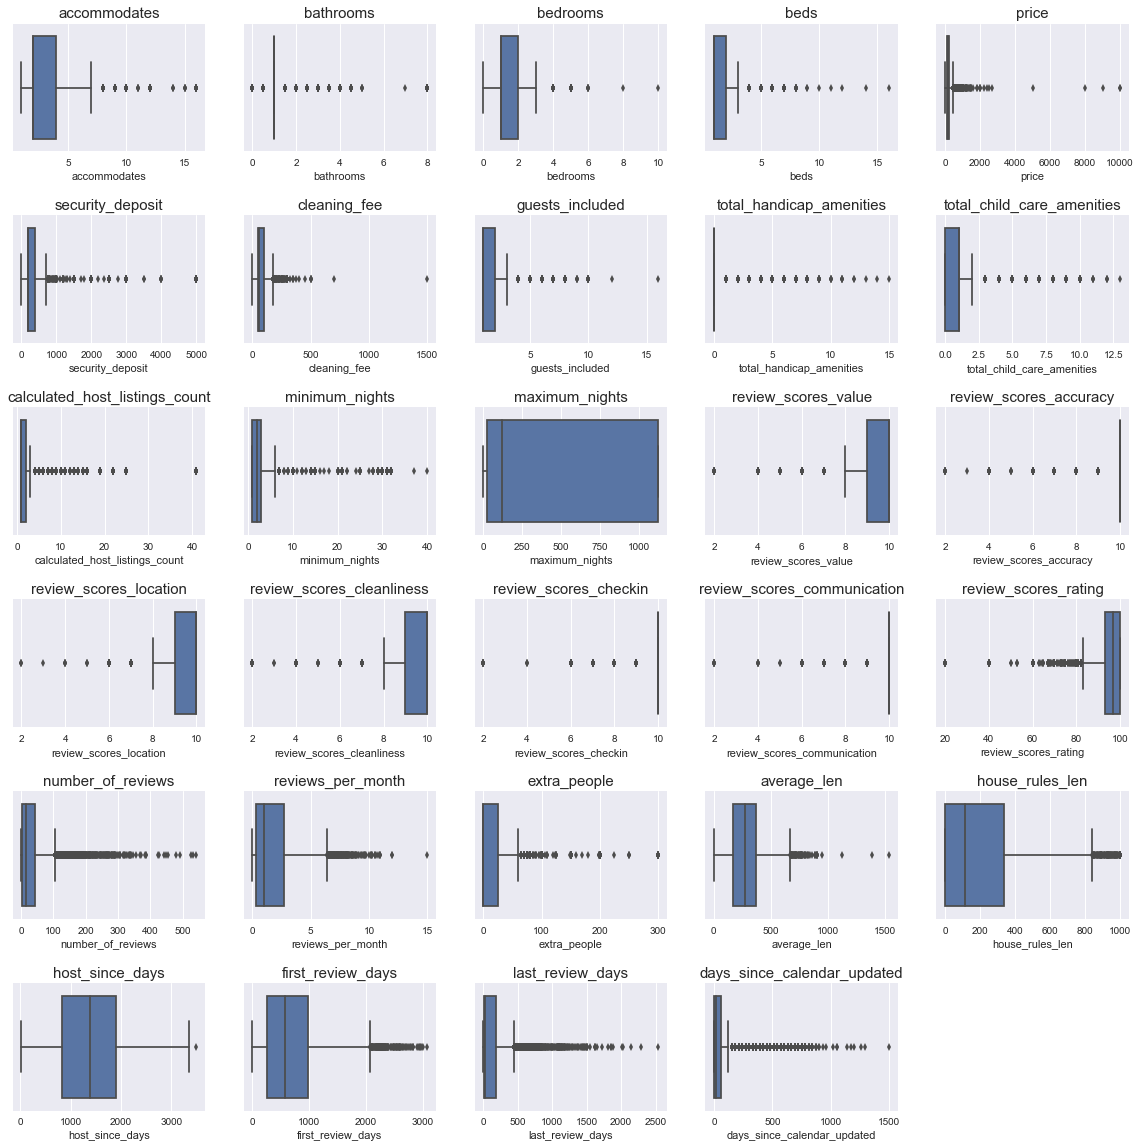

In [11]:
fig = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=.5)
for i,feature in enumerate(numerical):
    plt.subplot(6,5,i+1)
    ax = sns.boxplot(listings[feature])
    ax = plt.title(str(feature), size=15)

# Discrete Numerical

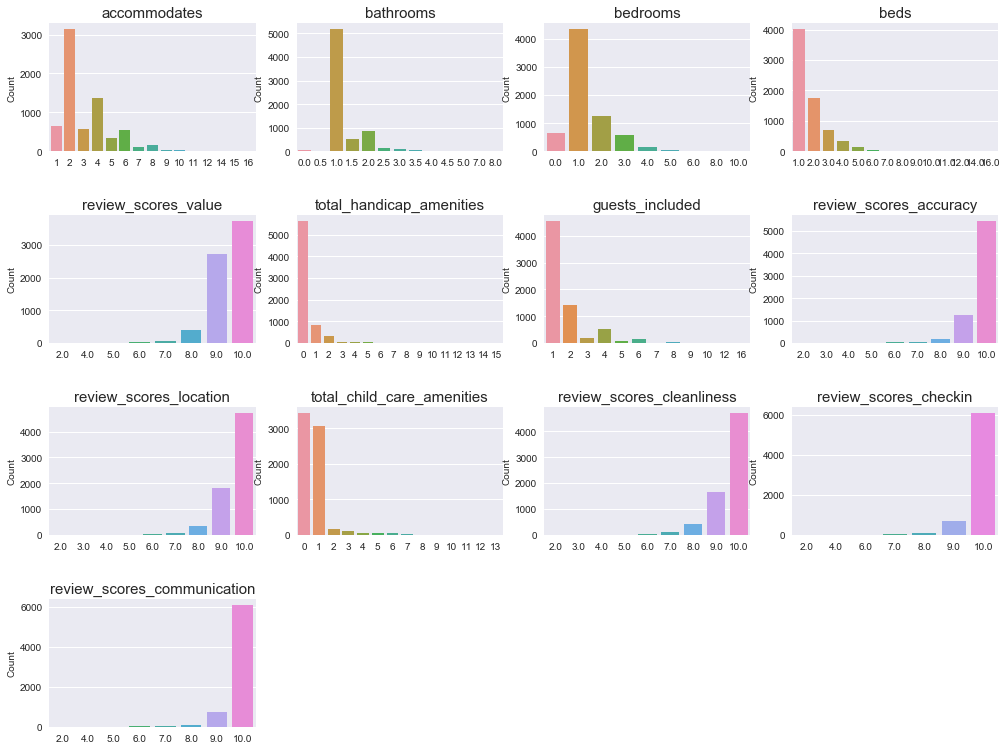

In [12]:
fig = plt.figure(figsize=(17,20))
plt.subplots_adjust(hspace=.5)
for i,feature in enumerate(discrete_numerical):
    plt.subplot(6,4,i+1)
    ax = sns.countplot(listings[feature])
    ax = plt.title(str(feature), size=15)
    _ = plt.xlabel('',fontsize=0)
    _ = plt.xticks(size=10)
    _ = plt.ylabel('Count',fontsize=10)
    _ = plt.yticks(size=10)
    

In [13]:
listings[discrete_numerical].apply(lambda x: np.percentile(x,99))

accommodates                  10.0000
bathrooms                      3.5000
bedrooms                       4.0000
beds                           6.0000
review_scores_value           10.0000
total_handicap_amenities       6.0000
guests_included                6.0000
review_scores_accuracy        10.0000
review_scores_location        10.0000
total_child_care_amenities     6.0000
review_scores_cleanliness     10.0000
review_scores_checkin         10.0000
review_scores_communication   10.0000
dtype: float64

## Continuous Numerical

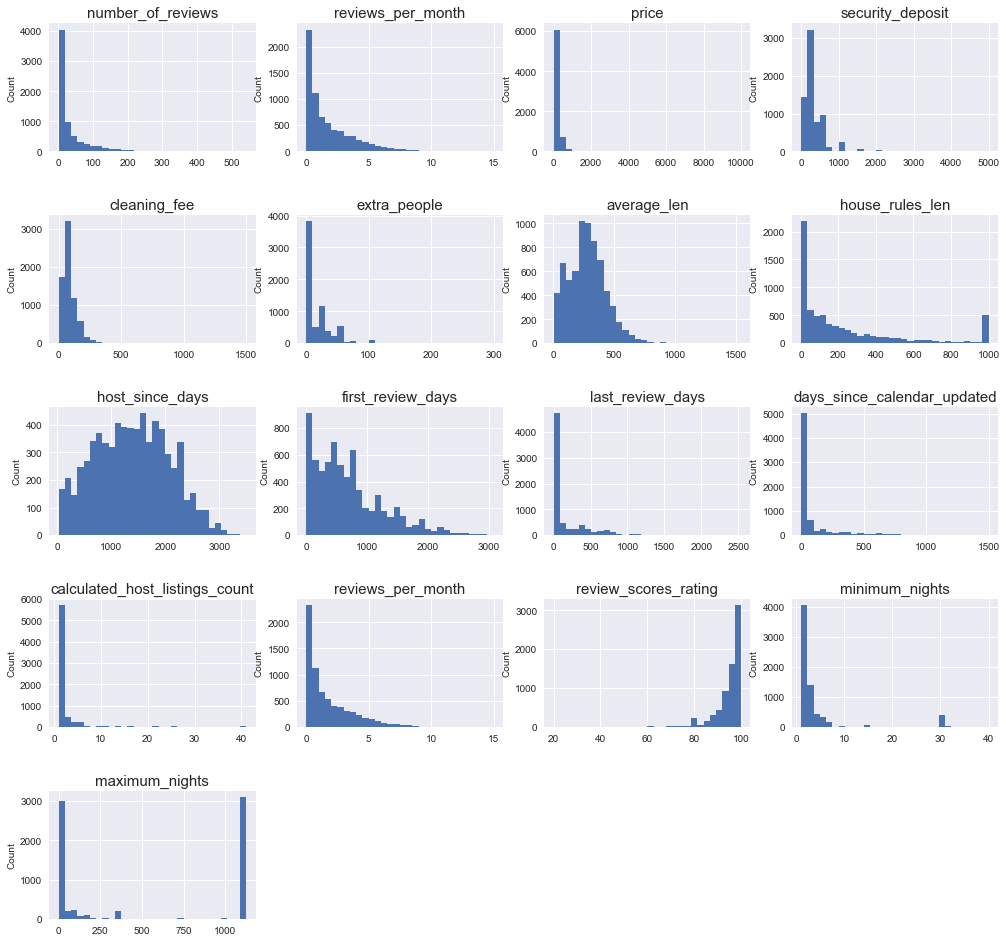

In [14]:
fig = plt.figure(figsize=(17,20))
plt.subplots_adjust(hspace=.5)
for i,feature in enumerate(continuous_numerical):
    plt.subplot(6,4,i+1)
    ax = plt.hist(listings[feature], bins=30)
    ax = plt.title(str(feature), size=15)
    _ = plt.xlabel('',fontsize=0)
    _ = plt.xticks(size=10)
    _ = plt.ylabel('Count',fontsize=10)
    _ = plt.yticks(size=10)

### Numerical - Heatpmap

A correlation heatmap will be a good way to spot multicollinearity between values.

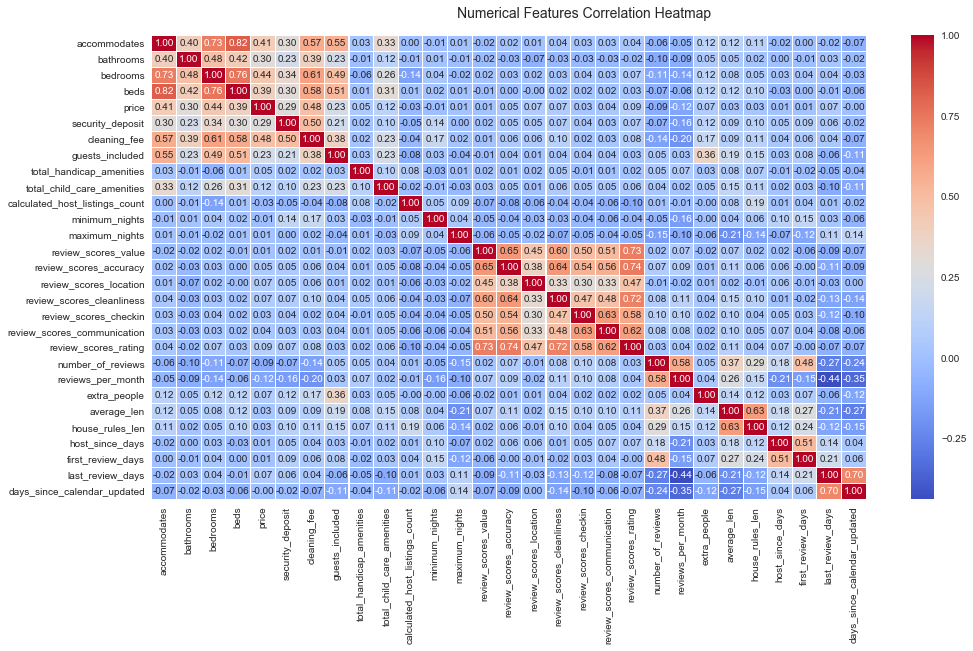

In [15]:
# Correlation Matrix Heatmap
corr = listings[numerical].corr()

f, ax = plt.subplots(figsize=(16, 8))

hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',annot_kws={"size": 10},linewidths=.05)

f.subplots_adjust(top=0.93)

t= f.suptitle('Numerical Features Correlation Heatmap', fontsize=14)

<a id='amenities'></a>
# Categorical

## Amenities

In [16]:
# Put amenities in order of most True to least True
amenities = list(listings[amenities].apply(pd.Series.value_counts).T.sort_values(by=1.0, ascending=False).T.columns)

In [17]:
listings[amenities].apply(pd.Series.value_counts).T.sort_values(by=1.0, ascending=False).T

,Wireless Internet,Heating,Essentials,Smoke detector,Kitchen,Shampoo,TV,Hangers,Carbon monoxide detector,Hair dryer,Washer,Laptop friendly workspace,Dryer,Iron,Internet,Fire extinguisher,Family/kid friendly,First aid kit,Cable TV,24-hour check-in,Self Check-In,Lock on bedroom door,Free parking on premises,Safety card,Buzzer/wireless intercom,Indoor fireplace,Private entrance,Pets live on this property,Lockbox,Refrigerator,Elevator,Dishes and silverware,Microwave,Bed linens,Hot water,Coffee maker,Cooking basics,Stove,Oven,Breakfast,Air conditioning,Extra pillows and blankets,Dog(s),Pets allowed,Dishwasher,Bathtub,Keypad,Gym,Garden or backyard,Patio or balcony,Luggage dropoff allowed,Hot tub,Cat(s),Wheelchair accessible,Suitable for events,Children’s books and toys,Room-darkening shades,Private living room,Pack ’n Play/travel crib,Long term stays allowed,Smart lock,Doorman,BBQ grill,Well-lit path to entrance,Step-free access,Children’s dinnerware,High chair,Smoking allowed,Single level home,Host greets you,Ethernet connection,Pool,Wide doorway,Babysitter recommendations,Stair gates,Wide hallway clearance,Flat,smooth pathway to front door,Outlet covers,Crib,Wide clearance to bed,Accessible-height bed,Game console,Wide entryway,Fireplace guards,Changing table,Baby bath,Accessible-height toilet,Handheld shower head,Cleaning before checkout,Wide clearance to shower & toilet,Pocket wifi,Hot water kettle,Window guards,Other pet(s),Private bathroom,Firm mattress,Beach essentials,Baby monitor,Table corner guards,EV charger,Disabled parking spot,Waterfront,Fixed grab bars for shower & toilet,Beachfront,Ground floor access,Lake access,Bathtub with shower chair,Paid parking off premises,Roll-in shower with chair
0,150,563,735,871,958,1679,1906,2036,2058,2197,2377,2391,2397,2490,2647,2871,3483,3778,4333,4729,5066,5414,5441,5492,5728,5738,5802,5828,5921,5955,5988,6006,6056,6076,6079,6113,6131,6169,6190,6199,6228,6255,6278,6306,6340,6357,6391,6506,6531,6534,6551,6576,6601,6658,6661,6683,6690,6694,6704,6727,6732,6742,6746,6799,6800,6811,6826,6826,6827,6836,6839,6862,6863,6865,6879,6881,6884,6884,6888,6894,6904,6905,6908,6913,6921,6926,6931,6933,6936,6949,6950,6951,6952,6953,6953,6958,6958,6958,6959,6963,6968,6972,6974,6974,6978,6979,6981,6981,6983,6983
1,6835,6422,6250,6114,6027,5306,5079,4949,4927,4788,4608,4594,4588,4495,4338,4114,3502,3207,2652,2256,1919,1571,1544,1493,1257,1247,1183,1157,1064,1030,997,979,929,909,906,872,854,816,795,786,757,730,707,679,645,628,594,479,454,451,434,409,384,327,324,302,295,291,281,258,253,243,239,186,185,174,159,159,158,149,146,123,122,120,106,104,101,101,97,91,81,80,77,72,64,59,54,52,49,36,35,34,33,32,32,27,27,27,26,22,17,13,11,11,7,6,4,4,2,2


In [18]:
(listings[amenities].apply(pd.Series.value_counts).T[1] >len(listings)*.05).sum()

53

In [19]:
len(listings)

6985

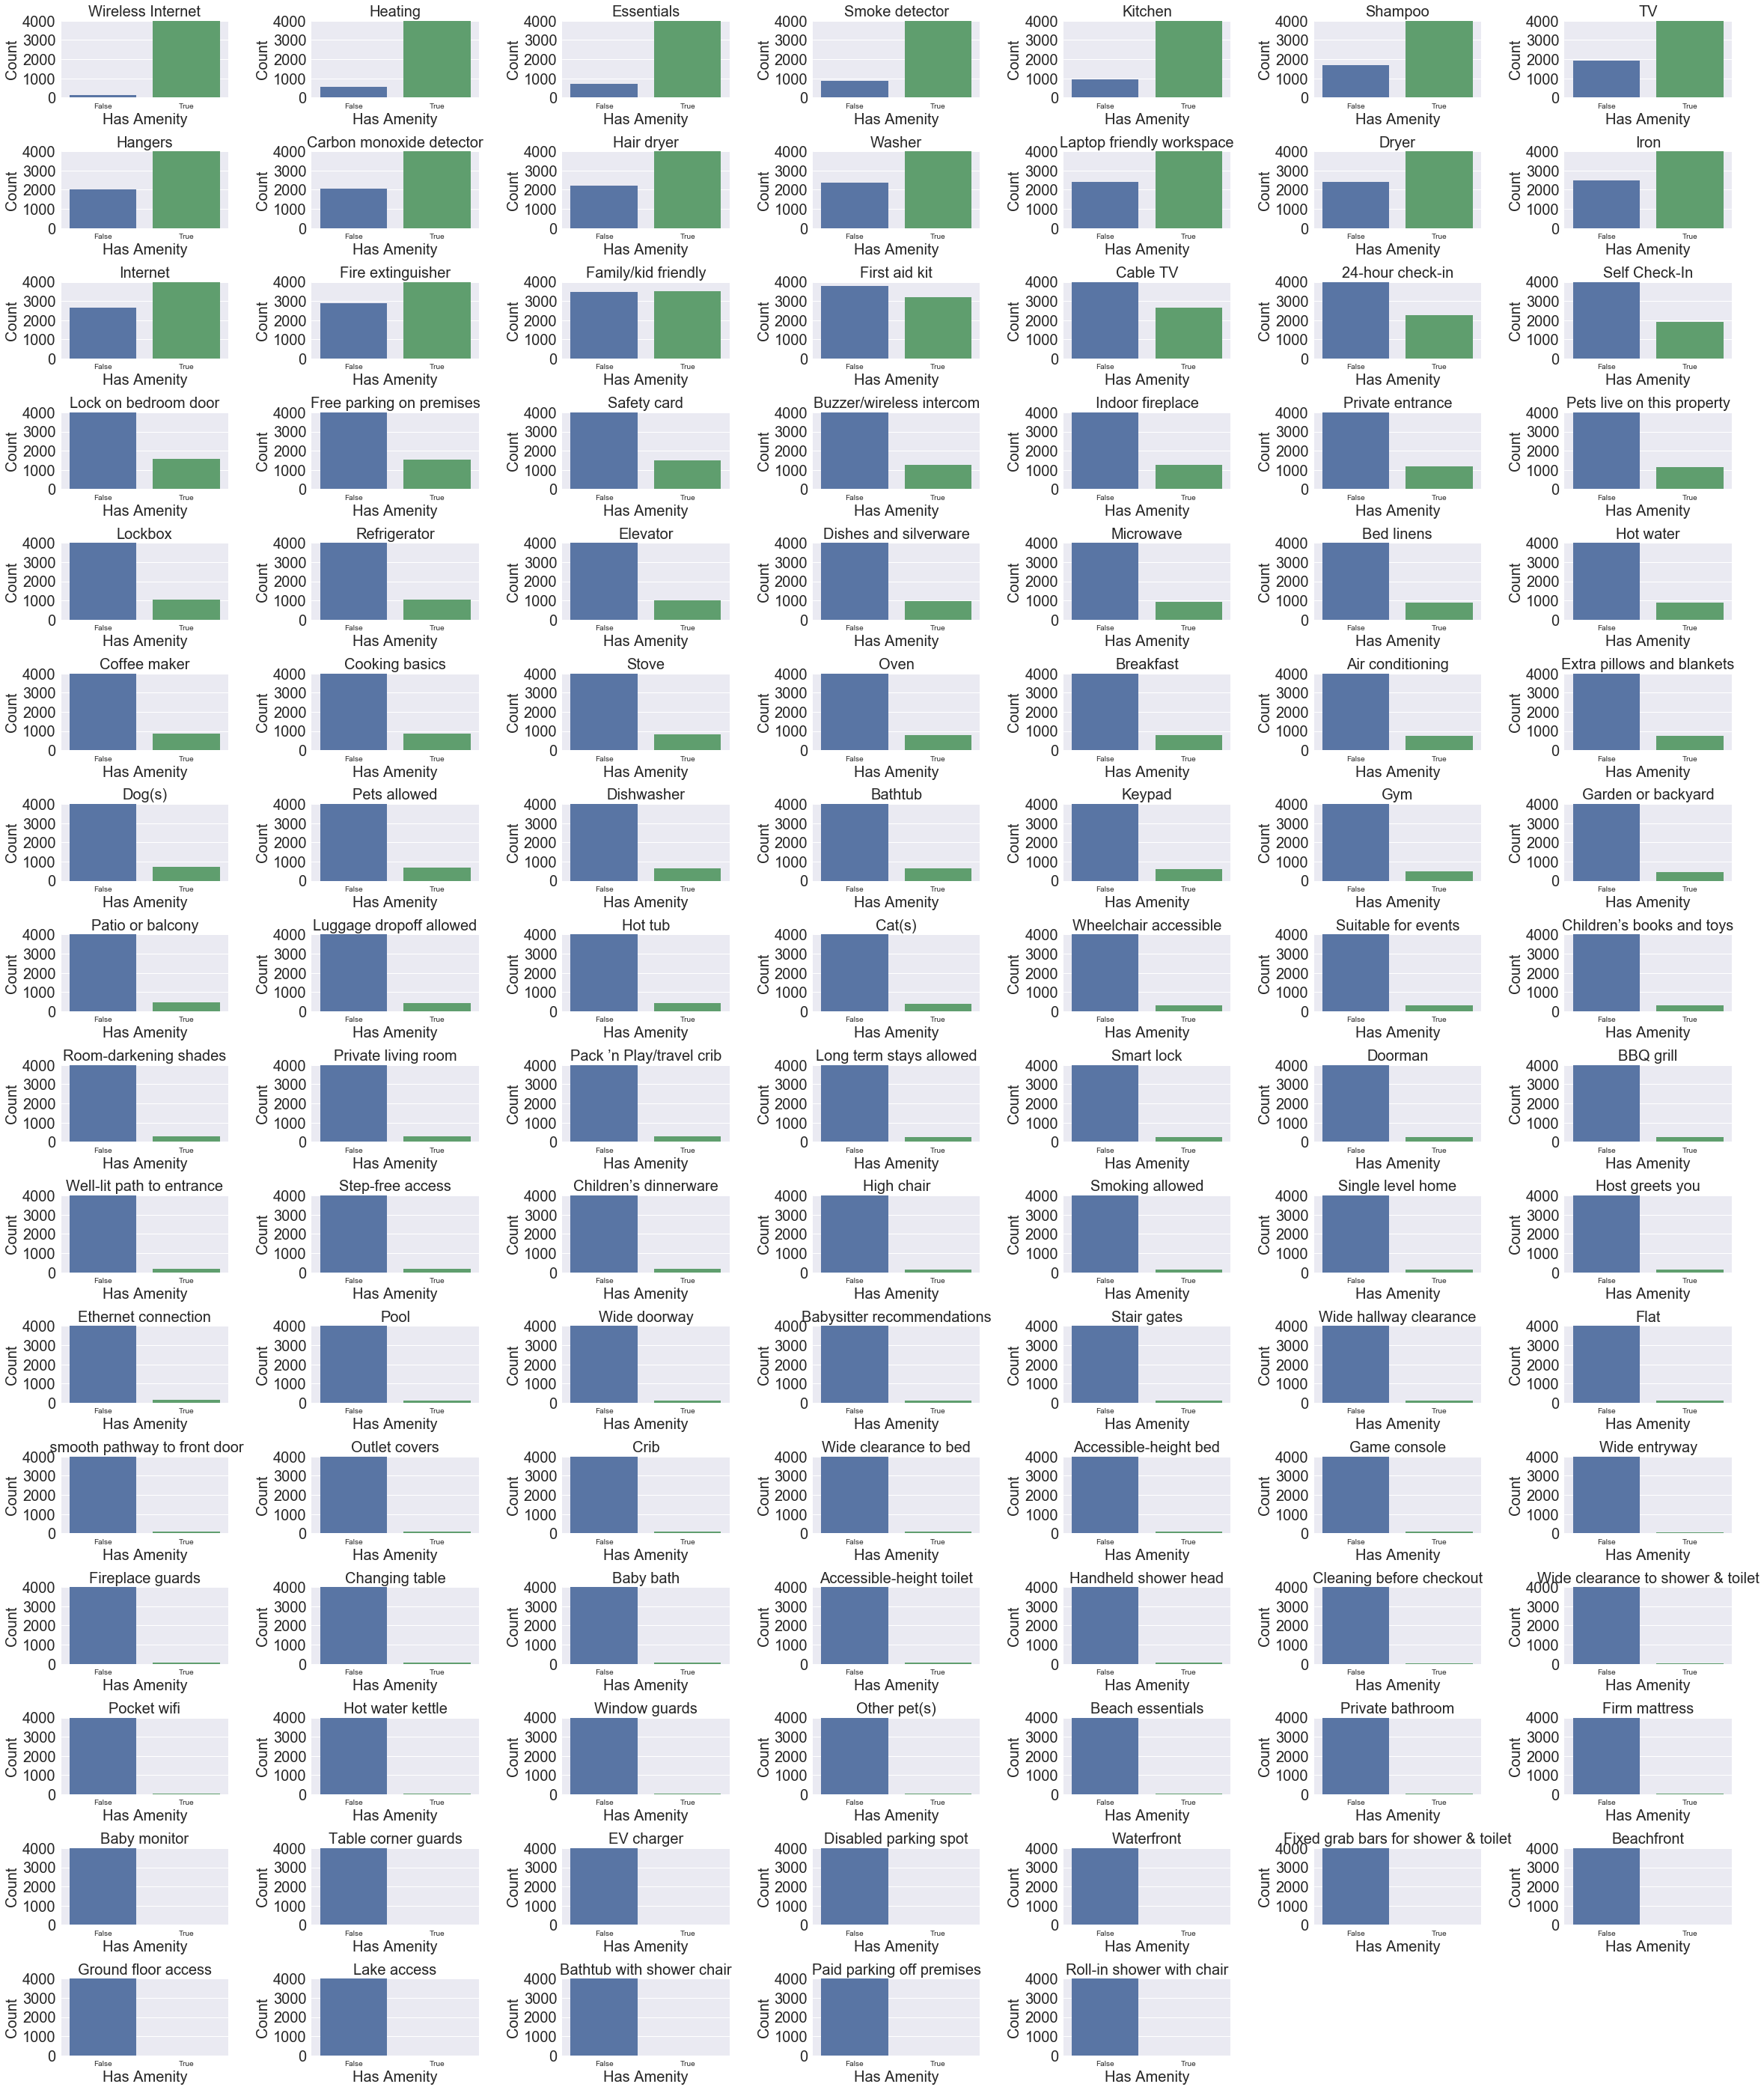

In [20]:
fig = plt.figure(figsize=(40,50))
plt.subplots_adjust(wspace=.5,hspace=.7)
for i,feature in enumerate(amenities):
    plt.subplot(16,7,i+1)
    ax = sns.countplot(listings[feature])
    ax = plt.title(str(feature), size=20)
    _ = plt.xlabel('Has Amenity',fontsize=20)
    _ = plt.xticks(np.arange(2),('False','True'),size=10)
    _ = plt.ylabel('Count',fontsize=20)
    _ = plt.yticks(size=20)
    _ = plt.ylim(0,4000)

<a id='true_false'></a>
# True / False

In [21]:
# Put amenities in order of most True to least True
true_false = list(listings[true_false].apply(pd.Series.value_counts).T.sort_values(by=1.0, ascending=False).T.columns)

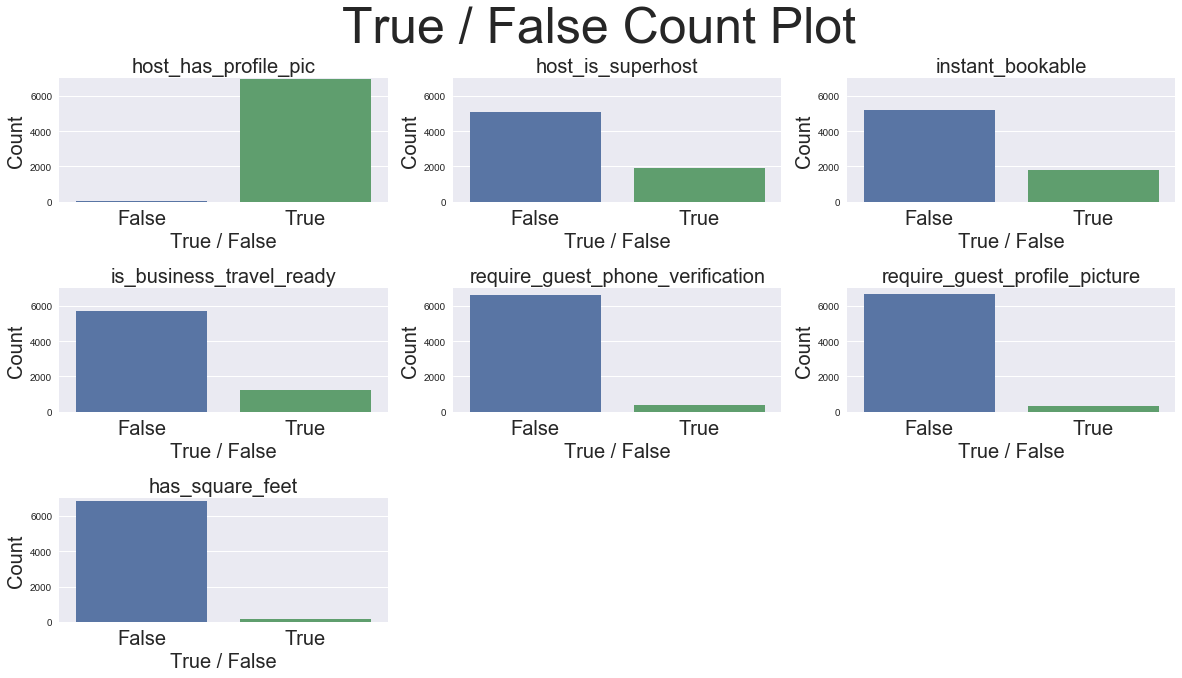

In [22]:
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.7)
plt.suptitle('True / False Count Plot', size=50)
for i,feature in enumerate(true_false):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(listings[feature])
    ax = plt.title(str(feature), size=20)
    _ = plt.xlabel('True / False',fontsize=20)
    _ = plt.xticks(size=20)
    _ = plt.ylabel('Count',fontsize=20)
    _ = plt.yticks(size=10)
    _ = plt.ylim(0,7000)

<a id='multi'></a>
# Multi Level Categories

In [23]:
multi_level = list(listings[multi_level].apply(pd.Series.nunique).sort_values(ascending=False).index)

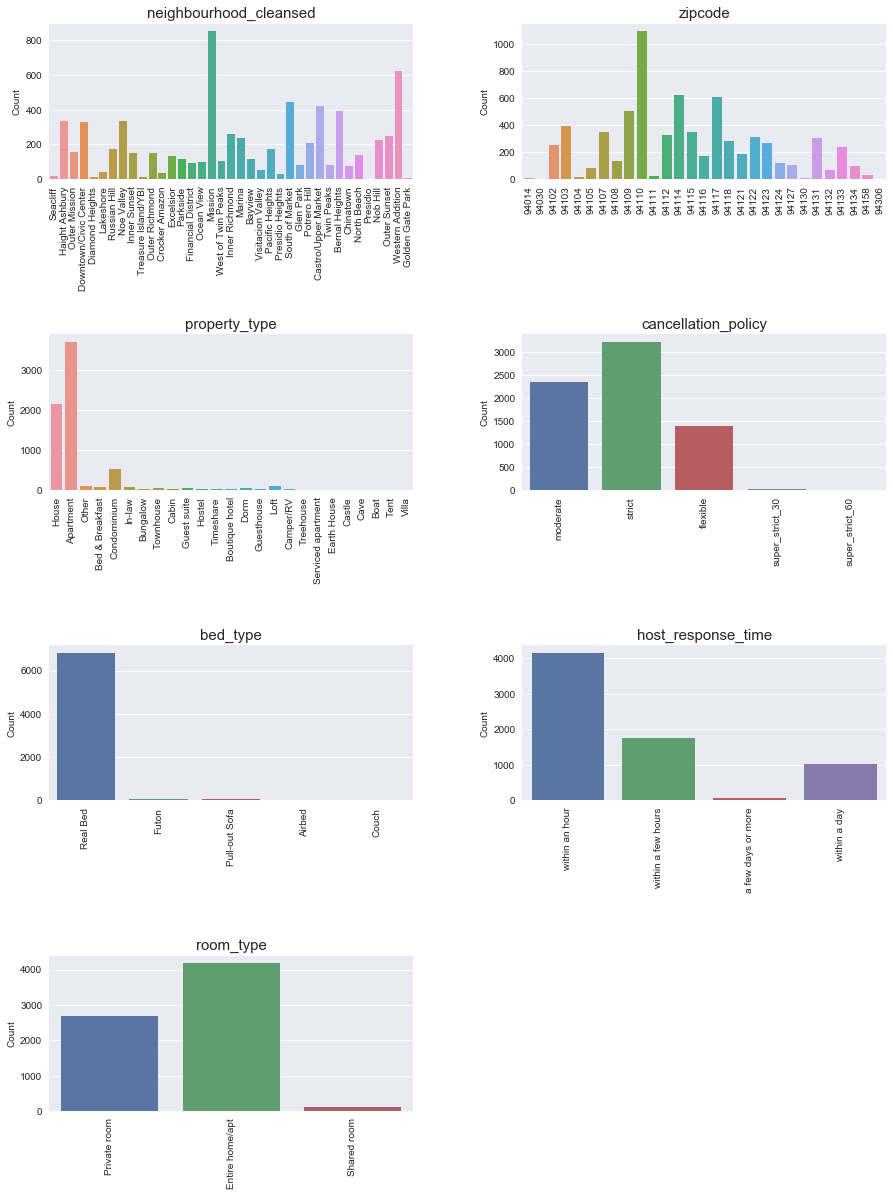

In [24]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.3,hspace=1)
plt.tight_layout
for i,feature in enumerate(multi_level):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(listings[feature])
    ax = plt.title(str(feature), size=15)
    _ = plt.xlabel('',fontsize=0)
    _ = plt.xticks(rotation=90,size=10)
    _ = plt.ylabel('Count',fontsize=10)
    _ = plt.yticks(size=10)

<a id='price'></a>
<center><h1> Price </h1></center>

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Summary Statistics

In [25]:
listings[['price']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,6985.0000,209.6510,283.2846,0.0000,100.0000,154.0000,249.0000,10000.0000


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Distribution

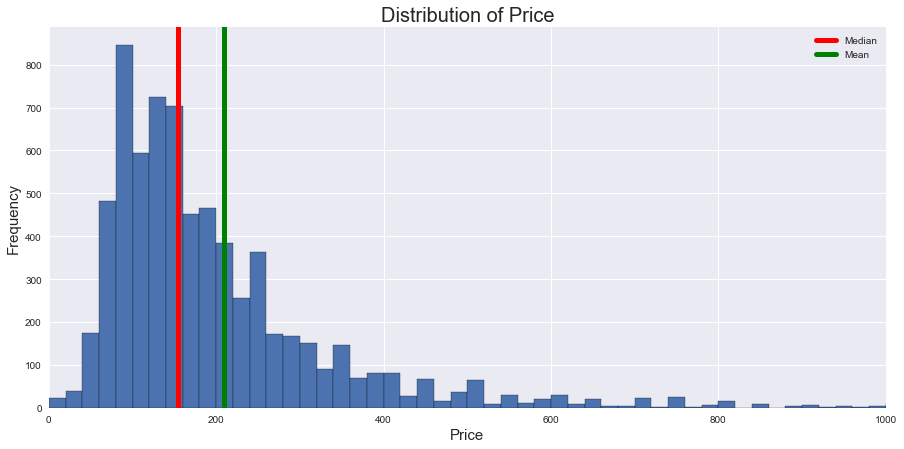

In [26]:
_ = plt.figure(figsize=(15,7))
_ = plt.axvline(x = listings['price'].median(), linewidth=5, color = 'red', label = 'Median')
_ = plt.axvline(x = listings['price'].mean(), linewidth=5, color = 'green', label = 'Mean')
_ = plt.hist(listings['price'],bins=500, ec='black')
_ = plt.legend()
_ = plt.xlim(0,1000)
_ = plt.xlabel('Price', fontsize=15)
_ = plt.ylabel('Frequency', fontsize=15)
_ = plt.title('Distribution of Price', fontsize=20)

The center of the distribution falls at \$153 and the mean is at \$210. This show that there is a right skew with a long tail. Some values seem to be outliers and should be removed from the dataset, so that they don't negatively affect the prediction models.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Boxplot

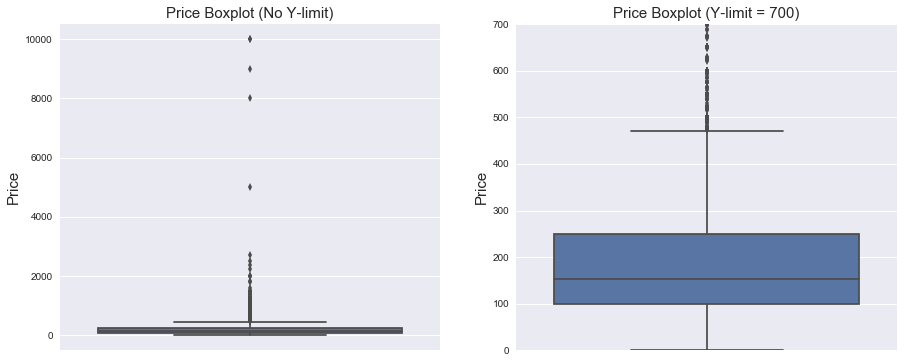

In [27]:
_ = plt.figure(figsize=(15,6))
_ = plt.subplot(1,2,1)
_ = sns.boxplot(y='price', data=listings)
_ = plt.title('Price Boxplot (No Y-limit)', fontsize=15)
_ = plt.ylabel('Price', fontsize=15)
_ = plt.subplot(1,2,2)
_ = sns.boxplot(y='price',data=listings, )
_ = plt.ylim([0,700])
_ = plt.title('Price Boxplot (Y-limit = 700)', fontsize=15)
_ = plt.ylabel('Price', fontsize=15)
plt.show()

In [28]:
Q1 = 105
Q3 = 250
IQR = Q3-Q1
outlier_boundary = Q3 + (1.5*IQR)
print('IQR Rule: Upper Outlier Boundary: {}'.format(outlier_boundary))
print('# of Outliers: {}'.format(len(listings[listings['price'] > 467.5])))

IQR Rule: Upper Outlier Boundary: 467.5
# of Outliers: 416


We can see how strongly right skewed the distribution of price for listings in San Francisco with these boxplots. We have to set the limit to around 700, just to be able to make since of the plot. The Interquartile range is between \$105 and \$250, yet the prices extend to around \$10,000. The IQR rule for outliers shows us that there are 347 outliers in this dataset. 

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Correlation Table

A correlation table can help us to decide what factors may have important relationships with price that we should explore

In [29]:
listings.corr()[['price']].sort_values(by='price',ascending=False).T

,price,cleaning_fee,bedrooms,accommodates,beds,bathrooms,security_deposit,guests_included,Family/kid friendly,Indoor fireplace,total_child_care_amenities,TV,is_business_travel_ready,Cable TV,Doorman,review_scores_rating,Free parking on premises,Dryer,Washer,Crib,Bathtub,Suitable for events,extra_people,review_scores_cleanliness,Buzzer/wireless intercom,review_scores_location,last_review_days,Wide hallway clearance,Step-free access,Dishwasher,Kitchen,Internet,Children’s dinnerware,Unnamed: 47,Stair gates,BBQ grill,total_handicap_amenities,Children’s books and toys,Carbon monoxide detector,Well-lit path to entrance,Pack ’n Play/travel crib,Changing table,review_scores_accuracy,High chair,Patio or balcony,Iron,Hot tub,Elevator,Oven,Accessible-height toilet,Room-darkening shades,Wide doorway,Air conditioning,Self Check-In,24-hour check-in,Fire extinguisher,Private entrance,Outlet covers,Laptop friendly workspace,Hot water kettle,Stove,review_scores_communication,Babysitter recommendations,Fireplace guards,Cooking basics,First aid kit,Ethernet connection,Shampoo,Hair dryer,Accessible-height bed,has_square_feet,average_len,review_scores_checkin,house_rules_len,Coffee maker,Wide clearance to bed,Wide entryway,Keypad,Smoke detector,Gym,Pets allowed,Heating,Game console,EV charger,Table corner guards,Dishes and silverware,Garden or backyard,Hangers,Baby monitor,Refrigerator,Wheelchair accessible,Safety card,first_review_days,Microwave,maximum_nights,smooth pathway to front door,Flat,Disabled parking spot,review_scores_value,require_guest_phone_verification,host_identity_verified,Essentials,Roll-in shower with chair,Long term stays allowed,Window guards,Pool,Lockbox,has_weekly_price,Pocket wifi,Baby bath,Paid parking off premises,Smart lock,host_since_days,Waterfront,Cleaning before checkout,Handheld shower head,Bathtub with shower chair,host_is_superhost,Firm mattress,require_guest_profile_picture,Hot water,Fixed grab bars for shower & toilet,host_has_profile_pic,Wide clearance to shower & toilet,Beach essentials,days_since_calendar_updated,Extra pillows and blankets,Wireless Internet,Bed linens,Luggage dropoff allowed,Private living room,Single level home,Ground floor access,Other pet(s),Dog(s),Beachfront,Lake access,zipcode,minimum_nights,Cat(s),Private bathroom,has_monthly_price,Breakfast,Host greets you,Pets live on this property,calculated_host_listings_count,instant_bookable,Smoking allowed,id,Lock on bedroom door,number_of_reviews,translation missing: en.hosting_amenity_50,translation missing: en.hosting_amenity_49,reviews_per_month
price,1.0000,0.4808,0.4371,0.4081,0.3945,0.2991,0.2897,0.2252,0.1375,0.1348,0.1161,0.1088,0.1071,0.1015,0.0883,0.0876,0.0839,0.0824,0.0818,0.0815,0.0754,0.0704,0.0691,0.0689,0.0665,0.0660,0.0652,0.0644,0.0628,0.0609,0.0577,0.0576,0.0570,0.0526,0.0525,0.0516,0.0502,0.0501,0.0480,0.0478,0.0470,0.0470,0.0465,0.0464,0.0462,0.0453,0.0418,0.0414,0.0413,0.0413,0.0411,0.0406,0.0397,0.0397,0.0394,0.0392,0.0387,0.0376,0.0371,0.0362,0.0361,0.0360,0.0346,0.0346,0.0337,0.0336,0.0312,0.0305,0.0285,0.0280,0.0272,0.0269,0.0261,0.0254,0.0251,0.0247,0.0246,0.0245,0.0238,0.0229,0.0215,0.0212,0.0205,0.0200,0.0193,0.0192,0.0180,0.0165,0.0164,0.0163,0.0162,0.0155,0.0148,0.0139,0.0136,0.0136,0.0136,0.0134,0.0128,0.0123,0.0115,0.0113,0.0111,0.0107,0.0101,0.0096,0.0094,0.0089,0.0085,0.0082,0.0081,0.0068,0.0064,0.0052,0.0051,0.0039,0.0035,0.0032,0.0030,0.0019,0.0009,-0.0003,-0.0009,-0.0012,-0.0031,-0.0038,-0.0040,-0.0041,-0.0050,-0.0055,-0.0056,-0.0070,-0.0071,-0.0078,-0.0089,-0.0097,-0.0097,-0.0115,-0.0116,-0.0152,-0.0154,-0.0199,-0.0258,-0.0294,-0.0300,-0.0329,-0.0434,-0.0440,-0.0467,-0.0809,-0.0910,-0.0984,-0.1078,-0.1244


<a id='bbab'></a>
## Price: Bedrooms & Bathrooms / Accommodates & Beds

Intuitively, one would assume that bedrooms, bathrooms, beds, and accommodates would have a significant relationship with the price of a listings. From the correlation table above, we can see that bedrooms, accommodates, and beds are the second, third,  fourth, and fifth most correlated predictors. 

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Line Chart

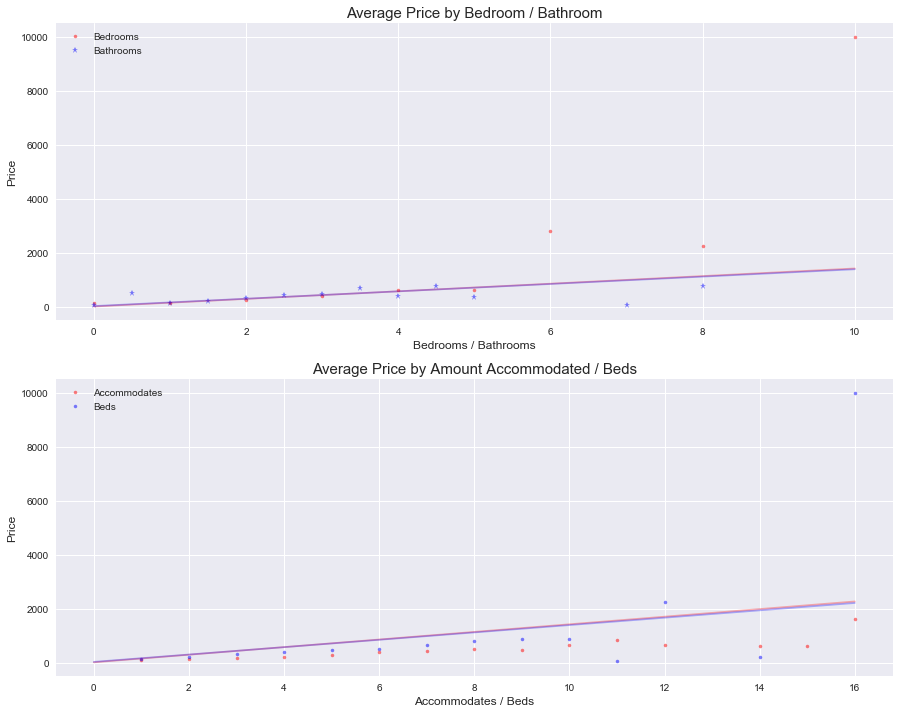

In [30]:
_ = plt.figure(figsize=(15,12))
_ = plt.subplot(2,1,1)
_ = plt.plot(listings.groupby(['bedrooms'])['price'].mean(),linestyle='none',marker='.',c='red', alpha=.5, label = 'Bedrooms')
_ = plt.plot(listings.groupby(['bathrooms'])['price'].mean(),linestyle='none',marker='*',c='blue',alpha=.5, label='Bathrooms')
_ = plt.legend()
_ = plt.xlabel('Bedrooms / Bathrooms',fontsize=12)
_ = plt.ylabel('Price',fontsize=12)
_ = plt.title('Average Price by Bedroom / Bathroom',fontsize=15)
a, b = np.polyfit(listings['bedrooms'],listings['price'],1)
c, d = np.polyfit(listings['bathrooms'],listings['price'],1)
x = np.array([0,10])
y = a * x + b
z = c* x + d
# Adding regression line to plot
_ = plt.plot(x, y, c='red',alpha=.3)
_ = plt.plot(x, z, c='blue',alpha=.3)

_ = plt.subplot(2,1,2)
_ = plt.plot(listings.groupby(['accommodates'])['price'].mean(),linestyle='none',marker='.',c='red', alpha=.5, label = 'Accommodates')
_ = plt.plot(listings.groupby(['beds'])['price'].mean(),linestyle='none',marker='.',c='blue', alpha=.5, label='Beds')
_ = plt.xlabel('Accommodates / Beds',fontsize=12)
_ = plt.ylabel('Price',fontsize=12)
_ = plt.legend()
_ = plt.title('Average Price by Amount Accommodated / Beds',fontsize=15)
a, b = np.polyfit(listings['bedrooms'],listings['price'],1)
c, d = np.polyfit(listings['bathrooms'],listings['price'],1)
x = np.array([0,16])
y = a * x + b
z = c* x + d
# Adding regression line to plot
_ = plt.plot(x, y, c='red',alpha=.3)
_ = plt.plot(x, z, c='blue',alpha=.3)

The price for listings that have 10 bedrooms shows a strong outlier. For the accommodates and beds chart you can see how much the regression line is pulled away from the points, due to the outlier. This is probably an extreme value, and not an erroneous point. 

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Boxplot

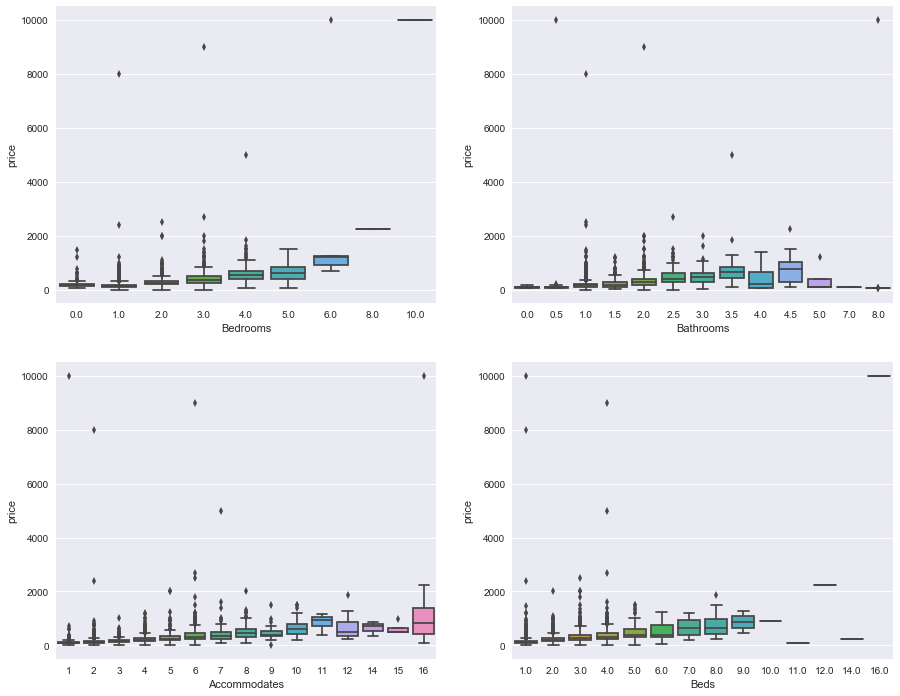

In [31]:
fig_ = plt.figure(figsize=(15,12))

_ = plt.subplot(2,2,1)
_ = sns.boxplot('bedrooms','price',data=listings)
_ = plt.xlabel('Bedrooms')

_ = plt.subplot(2,2,2)
_ = sns.boxplot('bathrooms','price',data=listings)
_ = plt.xlabel('Bathrooms')

_ = plt.subplot(2,2,3)
_ = sns.boxplot('accommodates','price',data=listings)
_ = plt.xlabel('Accommodates')

_ = plt.subplot(2,2,4)
_ = sns.boxplot('beds','price',data=listings)
_ = plt.xlabel('Beds')

In [32]:
listings[listings['bathrooms'] >= 7][['bathrooms','bedrooms','property_type','room_type','accommodates']].head(5)

,bathrooms,bedrooms,property_type,room_type,accommodates
517,8.0000,0.0000,Hostel,Private room,2
582,8.0000,0.0000,Hostel,Private room,2
610,8.0000,1.0000,Hostel,Private room,2
625,8.0000,1.0000,Hostel,Private room,2
666,8.0000,1.0000,Hostel,Private room,2


Hostels can claim all their bathrooms in the building as being part of the listing. This may be why bathrooms is less correlated then the other three independent variables we have been exploring. We should explore all the property types, rooms types, and bed types and their relationship with price

<a id='prb'></a>
## Price: Property Type / Room Type / Bed Type

The type of listings, room, and bed could have a significant relationship with price.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Frequency Plots


In [33]:
listings.groupby(['property_type'])[['price']].agg(['count','mean']).sort_values(by=('price','count'), ascending=False).T

property_type  Apartment     House  Condominium     Loft    Other   In-law  \
price count    3703.0000 2156.0000     513.0000  98.0000  85.0000  67.0000   
      mean      191.9444  223.9281     307.0838 236.9694 187.3529 149.3582   

property_type  Bed & Breakfast  Guest suite  Townhouse    Dorm  \
price count            67.0000      57.0000    49.0000 35.0000   
      mean            108.9104     151.8246   195.1429 60.9429   

property_type  Boutique hotel  Guesthouse  Timeshare  Hostel  Camper/RV  \
price count           32.0000     28.0000    25.0000 19.0000    13.0000   
      mean           449.3438    166.3214   296.7200 73.6842   102.8462   

property_type  Bungalow    Cabin   Castle     Boat  Treehouse   Villa    Tent  \
price count     12.0000   8.0000   5.0000   5.0000     2.0000  2.0000  1.0000   
      mean     188.0833 143.7500 137.0000 195.6000   277.0000 99.0000 98.0000   

property_type  Serviced apartment  Earth House     Cave  
price count                1.0000       1.0000   1.0000  
      mean              1200.0000      60.0000 147.0000

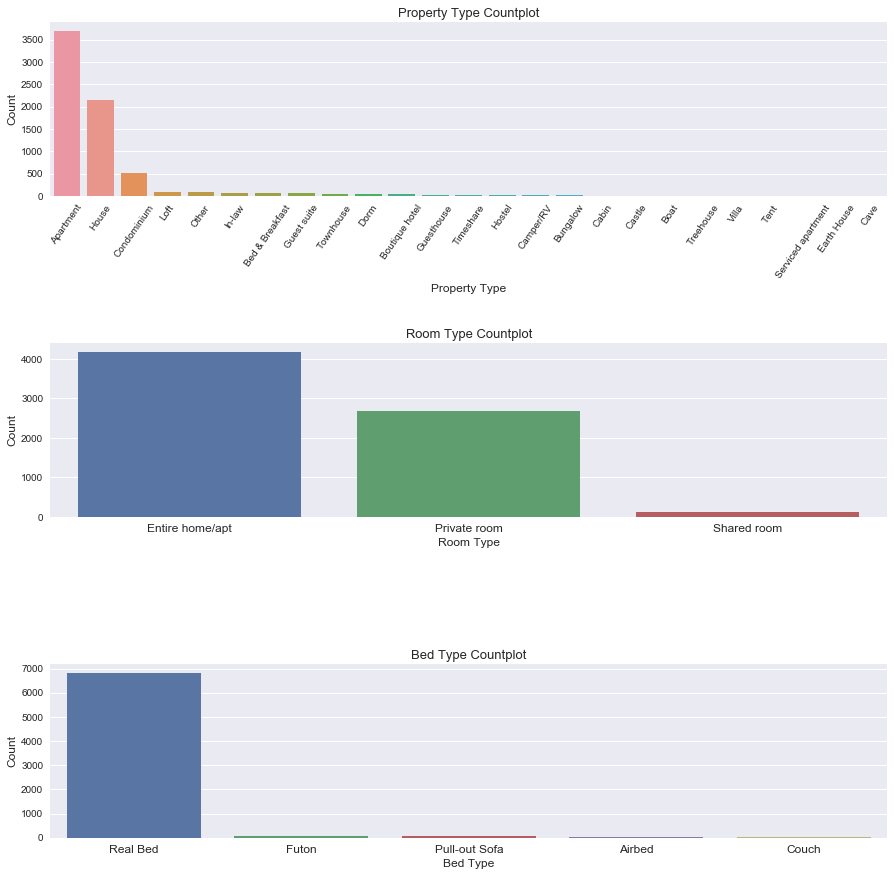

In [34]:
# Setting the figure size + space inbetween each subplot
fig = plt.figure(figsize=(15,15))
_ = fig.subplots_adjust(hspace=.85)

# Property Type
_ = plt.subplot(3,1,1)
bar_order = listings.groupby(['property_type'])[['price']].count().reset_index().sort_values(by='price',ascending=False)
_ = sns.countplot(x='property_type', data=listings, order=bar_order['property_type'])
_ = plt.xticks(rotation=55)
_ = plt.title('Property Type Countplot', fontsize=13)
_ = plt.ylabel('Count', fontsize=12)
_ = plt.xlabel('Property Type', fontsize=12)

# Room Type
_ = plt.subplot(3,1,2)
bar_order = listings.groupby(['room_type'])[['price']].count().reset_index().sort_values(by='price',ascending=False)
_ = sns.countplot(x='room_type', data=listings, order=bar_order['room_type'])
_ = plt.xticks(fontsize=12)
_ = plt.title('Room Type Countplot', fontsize=13)
_ = plt.ylabel('Count', fontsize=12)
_ = plt.xlabel('Room Type', fontsize=12)

# Bed Type
_ = plt.subplot(3,1,3)
bar_order = listings.groupby(['bed_type'])[['price']].count().reset_index().sort_values(by='price',ascending=False)
_ = sns.countplot(x='bed_type', data=listings, order=bar_order['bed_type'])
_ = plt.xticks(fontsize=12)
_ = plt.title('Bed Type Countplot', fontsize=13)
_ = plt.ylabel('Count', fontsize=12)
_ = plt.xlabel('Bed Type', fontsize=12)

In [35]:
top_3_count = len(listings[(listings['property_type'] == 'Apartment') |
             (listings['property_type'] == 'House') |
             (listings['property_type'] == 'Condominium')])
print('Property Type:')
print('Count of Apartment, House, & Condominium: {}'.format(top_3_count))
print('Percentage in Top 3: {}'.format(top_3_count/len(listings)))
print('Total Property Types with 30 or Less Occurences: {}'.format((listings['property_type'].value_counts() < 30).sum()))
print('\n')
print('Room Type:')
print(listings['room_type'].value_counts() / len(listings) *100 )
print('\n')
print('Bed Type:')
print('Percent Real Bed: {}'.format(len(listings[listings['bed_type']=='Real Bed'])/len(listings)*100))

Property Type:
Count of Apartment, House, & Condominium: 6372
Percentage in Top 3: 0.9122405153901217
Total Property Types with 30 or Less Occurences: 14


Room Type:
Entire home/apt   59.8998
Private room      38.4825
Shared room        1.6178
Name: room_type, dtype: float64


Bed Type:
Percent Real Bed: 97.82390837508947


In [36]:
listings['bed_type'].value_counts()

Real Bed         6833
Futon              56
Pull-out Sofa      54
Airbed             25
Couch              17
Name: bed_type, dtype: int64

<b> Property Type </b>

Of the 25 different property types in San Francisco over 90% fall into either an apartment, house, or condominium. Almost half of the property types have very low occurences too with under 30 occurences. We should consider grouping the other 22 categories together in some meaningful way. 

<b> Room Type </b>

There are only has three possible values with ~60% in entire home/apt, ~38% a private room, and ~2% shared room. 

<b> Bed Type </b>

Of the 5 different bed types, around 98 % of listings provide a real bed. We should consider consolidating the other four bed types

### Count of All

In [37]:
listings.groupby(['property_type','room_type','bed_type'])[['price']].agg(['count']).sort_values(by=('price','count'), ascending=False)[:10]

price
                                       count
property_type room_type       bed_type      
Apartment     Entire home/apt Real Bed  2434
              Private room    Real Bed  1169
House         Private room    Real Bed  1054
              Entire home/apt Real Bed  1039
Condominium   Entire home/apt Real Bed   336
              Private room    Real Bed   159
Loft          Entire home/apt Real Bed    62
In-law        Entire home/apt Real Bed    59
Other         Entire home/apt Real Bed    42
Guest suite   Entire home/apt Real Bed    41

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Median Bar Chart

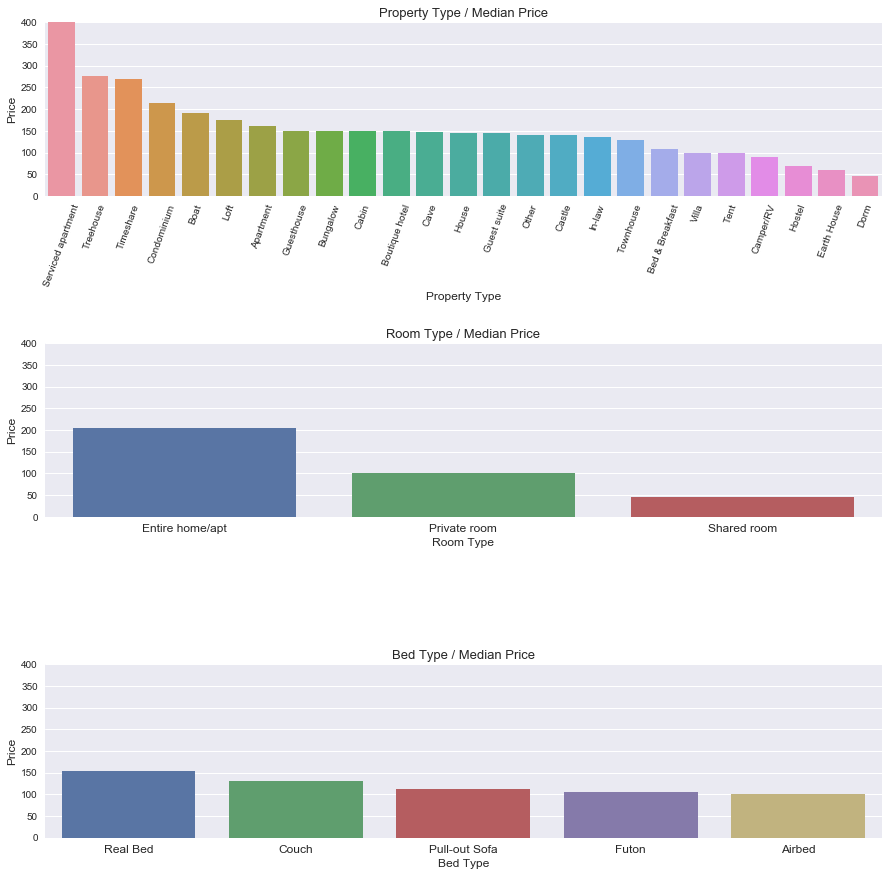

In [38]:
# Setting the figure size + space inbetween each subplot
fig = plt.figure(figsize=(15,15))
_ = fig.subplots_adjust(hspace=.85)

#Property Type
_ = plt.subplot(3,1,1)
order_prop_price = listings.groupby(['property_type'])[['price']].median().reset_index().sort_values(by='price',ascending=False)
g = sns.barplot(x='property_type',y='price',estimator=np.median, data=listings,ci=0, order=order_prop_price['property_type'])
_ = plt.xticks(rotation=70)
_ = plt.ylim([0,400])
_ = plt.title('Property Type / Median Price', fontsize=13)
_ = plt.ylabel('Price', fontsize=12)
_ = plt.xlabel('Property Type', fontsize=12)


# Room Type
_ = plt.subplot(3,1,2)
order_room_price = listings.groupby(['room_type'])[['price']].median().reset_index().sort_values(by='price',ascending=False)
g = sns.barplot(x='room_type',y='price', data=listings,estimator=np.median,ci=0, order=order_room_price['room_type'])
_ = plt.xticks(fontsize=12)
_ = plt.ylim([0,400])
_ = plt.title('Room Type / Median Price', fontsize=13)
_ = plt.ylabel('Price', fontsize=12)
_ = plt.xlabel('Room Type', fontsize=12)


# Bed Type
_ = plt.subplot(3,1,3)
order_bed_price = listings.groupby(['bed_type'])[['price']].median().reset_index().sort_values(by='price',ascending=False)
g = sns.barplot(x='bed_type',y='price',estimator=np.median, data=listings,ci=0, order=order_bed_price['bed_type'])
_ = plt.xticks(fontsize=12)
_ = plt.ylim([0,400])
_ = plt.title('Bed Type / Median Price', fontsize=13)
_ = plt.ylabel('Price', fontsize=12)
_ = plt.xlabel('Bed Type', fontsize=12)

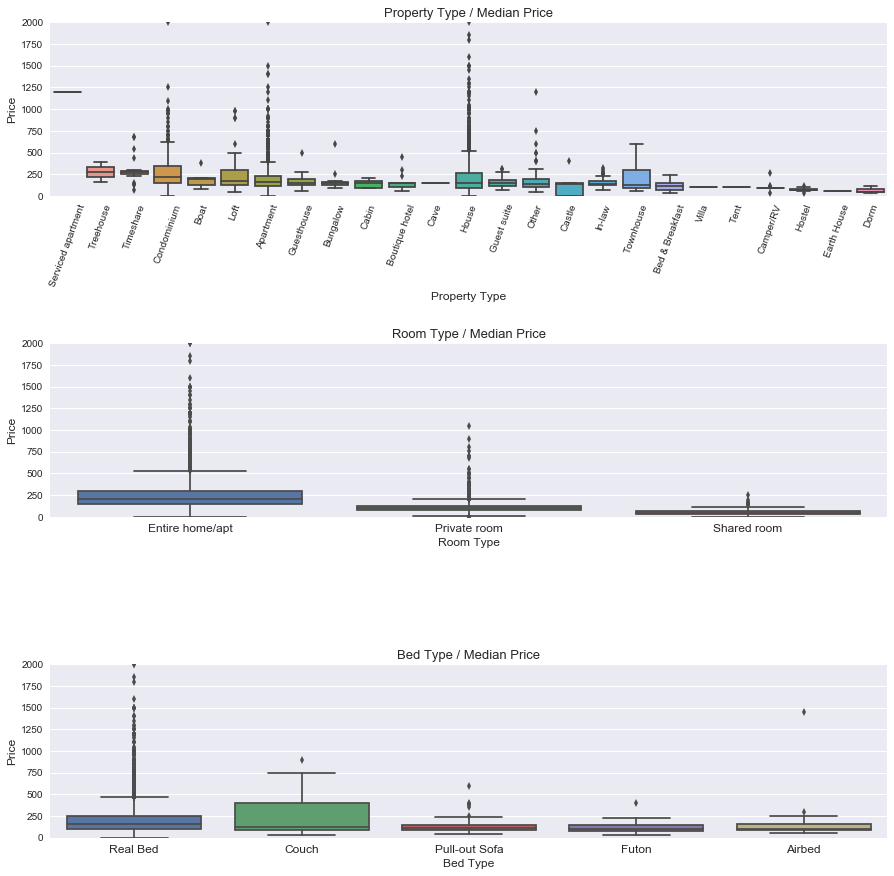

In [39]:
# Setting the figure size + space inbetween each subplot
fig = plt.figure(figsize=(15,15))
_ = fig.subplots_adjust(hspace=.85)

#Property Type
_ = plt.subplot(3,1,1)
order_prop_price = listings.groupby(['property_type'])[['price']].median().reset_index().sort_values(by='price',ascending=False)
g = sns.boxplot(x='property_type',y='price',data=listings, order=order_prop_price['property_type'])
_ = plt.xticks(rotation=70)
_ = plt.ylim([0,2000])
_ = plt.title('Property Type / Median Price', fontsize=13)
_ = plt.ylabel('Price', fontsize=12)
_ = plt.xlabel('Property Type', fontsize=12)


# Room Type
_ = plt.subplot(3,1,2)
order_room_price = listings.groupby(['room_type'])[['price']].median().reset_index().sort_values(by='price',ascending=False)
g = sns.boxplot(x='room_type',y='price', data=listings, order=order_room_price['room_type'])
_ = plt.xticks(fontsize=12)
_ = plt.ylim([0,2000])
_ = plt.title('Room Type / Median Price', fontsize=13)
_ = plt.ylabel('Price', fontsize=12)
_ = plt.xlabel('Room Type', fontsize=12)


# Bed Type
_ = plt.subplot(3,1,3)
order_bed_price = listings.groupby(['bed_type'])[['price']].median().reset_index().sort_values(by='price',ascending=False)
g = sns.boxplot(x='bed_type',y='price', data=listings, order=order_bed_price['bed_type'])
_ = plt.xticks(fontsize=12)
_ = plt.ylim([0,2000])
_ = plt.title('Bed Type / Median Price', fontsize=13)
_ = plt.ylabel('Price', fontsize=12)
_ = plt.xlabel('Bed Type', fontsize=12)

<a id='neighbourhood'></a>
## Price: Neighbourhood

In [40]:
listings.groupby('neighbourhood_cleansed')[['price']].agg(['median','mean','count']).sort_values(by=('price','median'), ascending=False).T

neighbourhood_cleansed   Marina  Russian Hill  Pacific Heights  \
price median           214.5000      199.0000         199.0000   
      mean             296.5042      280.3807         267.1897   
      count            236.0000      176.0000         174.0000   

neighbourhood_cleansed  Presidio Heights  Noe Valley  North Beach  \
price median                    195.0000    185.0000     184.0000   
      mean                      288.2581    231.4444     218.9137   
      count                      31.0000    333.0000     139.0000   

neighbourhood_cleansed  Castro/Upper Market  Chinatown  Glen Park  Presidio  \
price median                       180.0000   180.0000   178.0000  177.5000   
      mean                         234.3919   194.7703   210.6145  177.5000   
      count                        421.0000    74.0000    83.0000    2.0000   

neighbourhood_cleansed  Downtown/Civic Center  Potrero Hill  South of Market  \
price median                         172.5000      170.0000         170.0000   
      mean                           184.5970      227.1185         220.1009   
      count                          330.0000      211.0000         446.0000   

neighbourhood_cleansed  Nob Hill  Haight Ashbury  Golden Gate Park  \
price median            169.0000        168.5000          161.5000   
      mean              261.6504        225.6905          277.8333   
      count             226.0000        336.0000            6.0000   

neighbourhood_cleansed  Financial District  Seacliff  Diamond Heights  \
price median                      159.5000  159.0000         159.0000   
      mean                        316.5532  411.6667         187.7333   
      count                        94.0000   21.0000          15.0000   

neighbourhood_cleansed  Mission  Twin Peaks  Western Addition  Inner Richmond  \
price median           155.0000    150.0000          150.0000        150.0000   
      mean             189.3200    193.4250          233.2219        202.3817   
      count            853.0000     80.0000          622.0000        262.0000   

neighbourhood_cleansed  Bernal Heights  Inner Sunset  Outer Richmond  \
price median                  149.5000      147.0000        145.0000   
      mean                    189.2551      194.7905        171.3311   
      count                   392.0000      148.0000        151.0000   

neighbourhood_cleansed  West of Twin Peaks  Outer Sunset  Parkside  \
price median                      127.5000      125.0000  120.0000   
      mean                        173.8654      147.4597  216.9060   
      count                       104.0000      248.0000  117.0000   

neighbourhood_cleansed  Outer Mission  Excelsior  Ocean View  Bayview  \
price median                 118.0000   100.0000     99.0000  95.0000   
      mean                   151.9427   119.3529    131.7723 109.4202   
      count                  157.0000   136.0000    101.0000 119.0000   

neighbourhood_cleansed  Lakeshore  Visitacion Valley  Treasure Island/YBI  \
price median              94.0000            90.0000              89.0000   
      mean               130.3902           119.0769             110.0000   
      count               41.0000            52.0000              11.0000   

neighbourhood_cleansed  Crocker Amazon  
price median                   84.0000  
      mean                     87.7568  
      count                    37.0000

In [41]:
listings.groupby('neighbourhood_cleansed')[['price']].median().describe().T

,count,mean,std,min,25%,50%,75%,max
price,37.0000,150.5135,35.4127,84.0000,125.0000,159.0000,177.5000,214.5000


There are 37 different neighborhoods with a range in medians of \$80 to \$217. The Marina has the highest median price and seems to one of the most expensive places to rent an Airbnb

<a id='ibbtr'></a>
## Price: Instant Bookable / Business Travel Ready

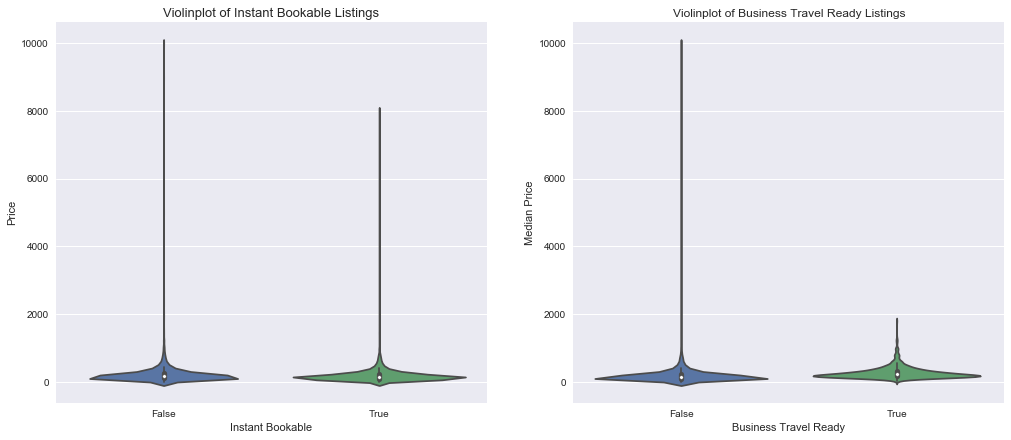

In [42]:
fiog = plt.figure(figsize=(17,7))
_ = plt.subplot(1,2,1) 
g = sns.violinplot(x='instant_bookable',y='price',data=listings)
_ = plt.xlabel('Instant Bookable')
_ = plt.ylabel('Price')
_ = plt.title('Violinplot of Instant Bookable Listings', fontsize=13)
for p in g.patches:
    g.annotate(str(int(p.get_height())), (p.get_x(), p.get_height() * 1.015))
_ = plt.subplot(1,2,2)    
g = sns.violinplot(x='is_business_travel_ready',y='price',data=listings, )
_ = plt.xlabel('Business Travel Ready')
_ = plt.ylabel('Median Price')
_ = plt.title('Violinplot of Business Travel Ready Listings')

Listings that are instantly bookable are seem to cost less than one that take away the ability to book instantly, while business travel ready listings are much more expensive then those that don't have its features. Business travel ready are listings that have: 24-hour check-in, A laptop-ready workspace, are an entire home, and Wireless internet

<a id='rating'></a>
<center><h1>Ratings</h1></center>

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Summary Statistics

In [43]:
listings[['review_scores_rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
review_scores_rating,6985.0000,94.9319,7.0497,20.0000,93.0000,97.0000,100.0000,100.0000


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Distribution

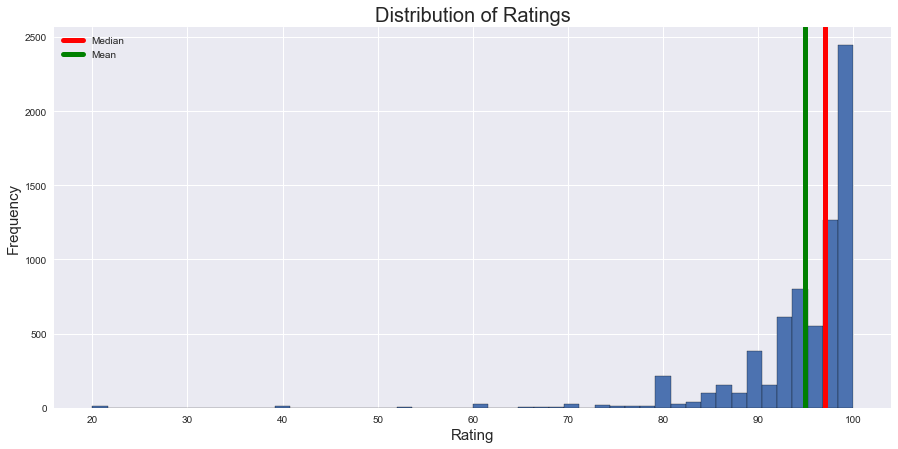

In [44]:
_ = plt.figure(figsize=(15,7))
_ = plt.axvline(x = listings['review_scores_rating'].median(), linewidth=5, color = 'red', label = 'Median')
_ = plt.axvline(x = listings['review_scores_rating'].mean(), linewidth=5, color = 'green', label = 'Mean')
_ = plt.hist(listings['review_scores_rating'],bins=50, ec='black')
_ = plt.legend()
_ = plt.xlabel('Rating', fontsize=15)
_ = plt.ylabel('Frequency', fontsize=15)
_ = plt.title('Distribution of Ratings', fontsize=20)

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Boxplot

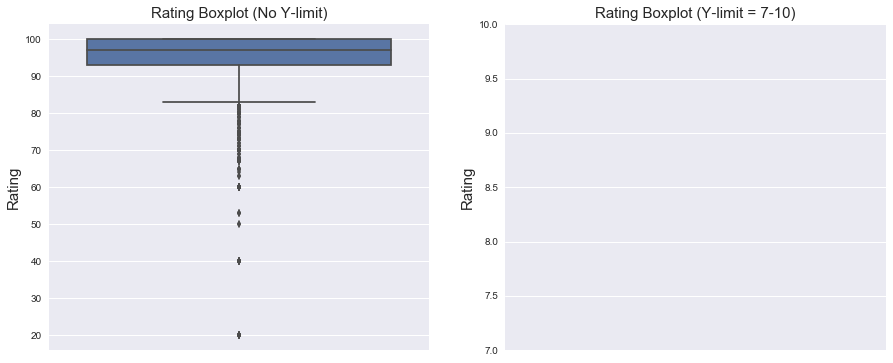

In [45]:
_ = plt.figure(figsize=(15,6))
_ = plt.subplot(1,2,1)
_ = sns.boxplot(y='review_scores_rating', data=listings)
_ = plt.title('Rating Boxplot (No Y-limit)', fontsize=15)
_ = plt.ylabel('Rating', fontsize=15)
_ = plt.subplot(1,2,2)
_ = sns.boxplot(y='review_scores_rating',data=listings)
_ = plt.ylim([7,10])
_ = plt.title('Rating Boxplot (Y-limit = 7-10)', fontsize=15)
_ = plt.ylabel('Rating', fontsize=15)

In [46]:
Q1_rating = 9.125
Q3_rating = 9.875
IQR_rating = Q3_rating-Q1_rating
outlier_boundary_rating = Q1_rating - (1.5*IQR_rating)
print('IQR Rule: Upper Outlier Boundary: {}'.format(outlier_boundary_rating))
print('# of Outliers: {}'.format(len(listings[listings['review_scores_rating'] < 8.0 ])))

IQR Rule: Upper Outlier Boundary: 8.0
# of Outliers: 0


The ratings are left skewed with the majority of ratings 8 or higher. There are 296 outliers that fall underneath the lower boundary for the IQR rule

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Correlation

In [47]:
listings.corr()[['review_scores_rating']].sort_values(by='review_scores_rating',ascending=False)[:10]

,review_scores_rating
review_scores_rating,1.0000
review_scores_accuracy,0.7432
review_scores_value,0.7320
review_scores_cleanliness,0.7235
review_scores_communication,0.6207
review_scores_checkin,0.5842
review_scores_location,0.4715
host_is_superhost,0.2054
is_business_travel_ready,0.1223
Hair dryer,0.1205


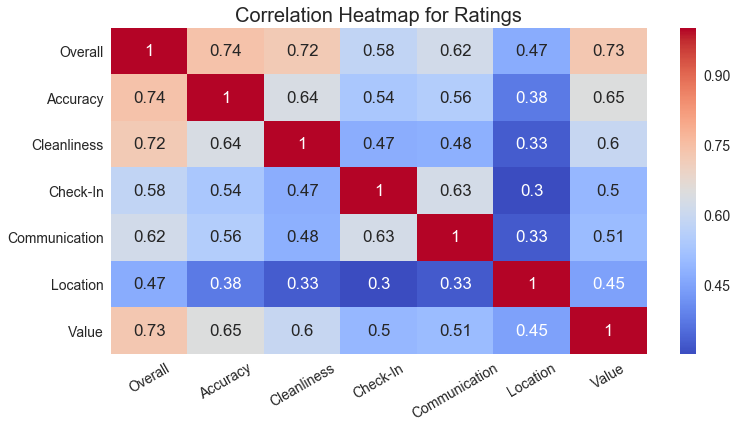

In [48]:
sns.set(font_scale = 1.4)
_ = plt.figure(figsize=(12,6))
yticks = np.array(['Overall','Accuracy','Cleanliness','Check-In','Communication','Location','Value'])
g = sns.heatmap(listings[reviews].corr(), cmap ='coolwarm',annot=True,yticklabels=yticks)
_ = plt.title('Correlation Heatmap for Ratings',fontsize=20)
_ = g.set_xticklabels(yticks,rotation=30)

Besides the other reviews scores, the listings ratings has no significant relationship with other factors. The location scores has the lowest correlations with the other reviews. It would be interesting to explore the rating score and location scores with each neighborhood

<a id='neighbourhood_r'></a>
## Rating: Neighbourhood

In [49]:
listings.groupby('neighbourhood_cleansed')[['review_scores_rating', 'review_scores_location']].agg(['mean']).sort_values(by=('review_scores_rating','mean'), ascending=False).T

,neighbourhood_cleansed,Diamond Heights,Presidio,Castro/Upper Market,Twin Peaks,Potrero Hill,Noe Valley,West of Twin Peaks,Treasure Island/YBI,Presidio Heights,Outer Mission,Seacliff,Mission,Bernal Heights,Western Addition,Glen Park,Pacific Heights,Marina,Inner Sunset,Russian Hill,South of Market,Outer Richmond,Haight Ashbury,Visitacion Valley,Inner Richmond,Lakeshore,Financial District,North Beach,Outer Sunset,Nob Hill,Parkside,Ocean View,Excelsior,Golden Gate Park,Downtown/Civic Center,Bayview,Chinatown,Crocker Amazon
review_scores_rating,mean,97.9333,96.5000,96.4774,96.3875,96.2559,96.1441,96.1154,96.0909,96.0323,95.6369,95.6190,95.4924,95.4362,95.3794,95.3735,95.3218,95.3051,95.1486,94.9830,94.8834,94.8411,94.6429,94.5385,94.4962,94.4146,94.3830,94.3237,93.9879,93.9690,93.8205,93.7030,93.3529,92.5000,92.0848,92.0672,91.9595,91.6486
review_scores_location,mean,9.6000,9.5000,9.8931,9.5375,9.5118,9.8228,9.6442,9.7273,9.6774,9.2675,9.6190,9.5955,9.5102,9.7669,9.7108,9.8908,9.9153,9.7162,9.8977,9.3946,9.4834,9.7649,8.9615,9.6336,9.4878,9.7660,9.7914,9.4113,9.8009,9.3761,9.0594,8.8676,9.6667,9.1545,8.2773,9.7432,8.6757


In [50]:
listings['neighbourhood_cleansed'].nunique()

37

In [51]:
listings[['review_scores_rating','review_scores_location']].describe()

,review_scores_rating,review_scores_location
count,6985.0000,6985.0000
mean,94.9319,9.5784
std,7.0497,0.7333
min,20.0000,2.0000
25%,93.0000,9.0000
50%,97.0000,10.0000
75%,100.0000,10.0000
max,100.0000,10.0000


The location scores tend to be higher than the rating scores. Location must not be one of the strongest factors in the ratings, since it isn't that correlated

<a id='bbba_r'></a>
## Rating: Bedrooms / Bathrooms / Beds / Accommodates

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Linechart

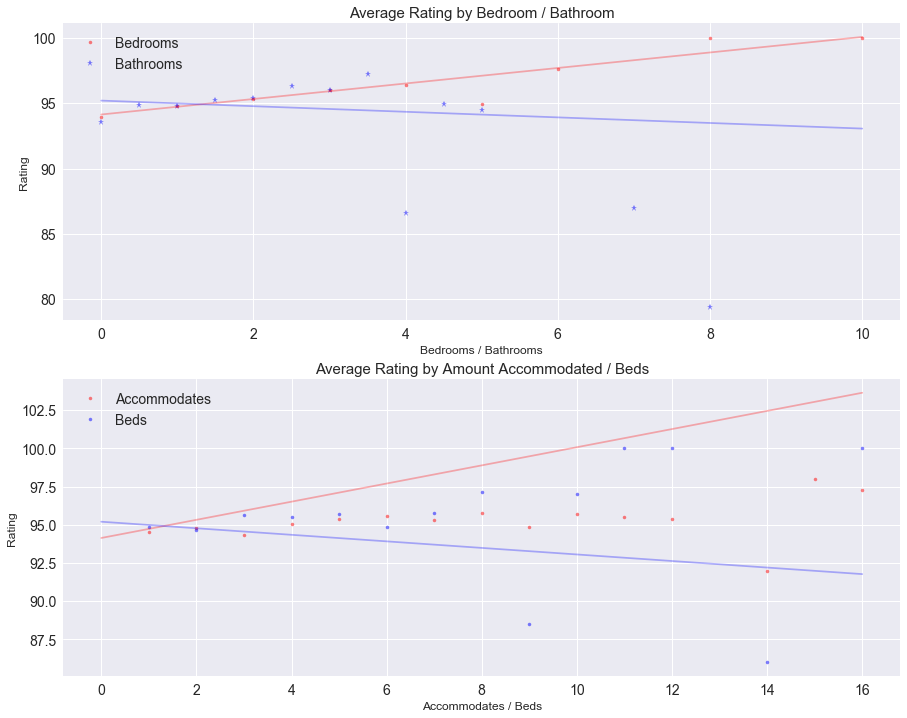

In [52]:
_ = plt.figure(figsize=(15,12))
_ = plt.subplot(2,1,1)
_ = plt.plot(listings.groupby(['bedrooms'])['review_scores_rating'].mean(),linestyle='none',marker='.',c='red', alpha=.5, label = 'Bedrooms')
_ = plt.plot(listings.groupby(['bathrooms'])['review_scores_rating'].mean(),linestyle='none',marker='*',c='blue',alpha=.5, label='Bathrooms')
_ = plt.legend()
_ = plt.xlabel('Bedrooms / Bathrooms',fontsize=12)
_ = plt.ylabel('Rating',fontsize=12)
_ = plt.title('Average Rating by Bedroom / Bathroom',fontsize=15)
a, b = np.polyfit(listings['bedrooms'],listings['review_scores_rating'],1)
c, d = np.polyfit(listings['bathrooms'],listings['review_scores_rating'],1)
x = np.array([0,10])
y = a * x + b
z = c* x + d
# Adding regression line to plot
_ = plt.plot(x, y, c='red',alpha=.3)
_ = plt.plot(x, z, c='blue',alpha=.3)

_ = plt.subplot(2,1,2)
_ = plt.plot(listings.groupby(['accommodates'])['review_scores_rating'].mean(),linestyle='none',marker='.',c='red', alpha=.5, label = 'Accommodates')
_ = plt.plot(listings.groupby(['beds'])['review_scores_rating'].mean(),linestyle='none',marker='.',c='blue', alpha=.5, label='Beds')
_ = plt.xlabel('Accommodates / Beds',fontsize=12)
_ = plt.ylabel('Rating',fontsize=12)
_ = plt.legend()
_ = plt.title('Average Rating by Amount Accommodated / Beds',fontsize=15)
a, b = np.polyfit(listings['bedrooms'],listings['review_scores_rating'],1)
c, d = np.polyfit(listings['bathrooms'],listings['review_scores_rating'],1)
x = np.array([0,16])
y = a * x + b
z = c* x + d
# Adding regression line to plot
_ = plt.plot(x, y, c='red',alpha=.3)
_ = plt.plot(x, z, c='blue',alpha=.3)

It is interesting how ratings increase with the amount accommodated and bedrooms, yet decreases with the number of bathrooms and beds. Ratings tend to increase as bathroom increases from 0 to 3.5 and then start to decrease rapidly. There are only 27 listing with 4 or more bathrooms, and the listings with the low reviews are the ones with communial bathrooms like a hostel.

<a id='prb_r'></a>
## Rating: Property Type / Room Type / Bed Type

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Bar Chart

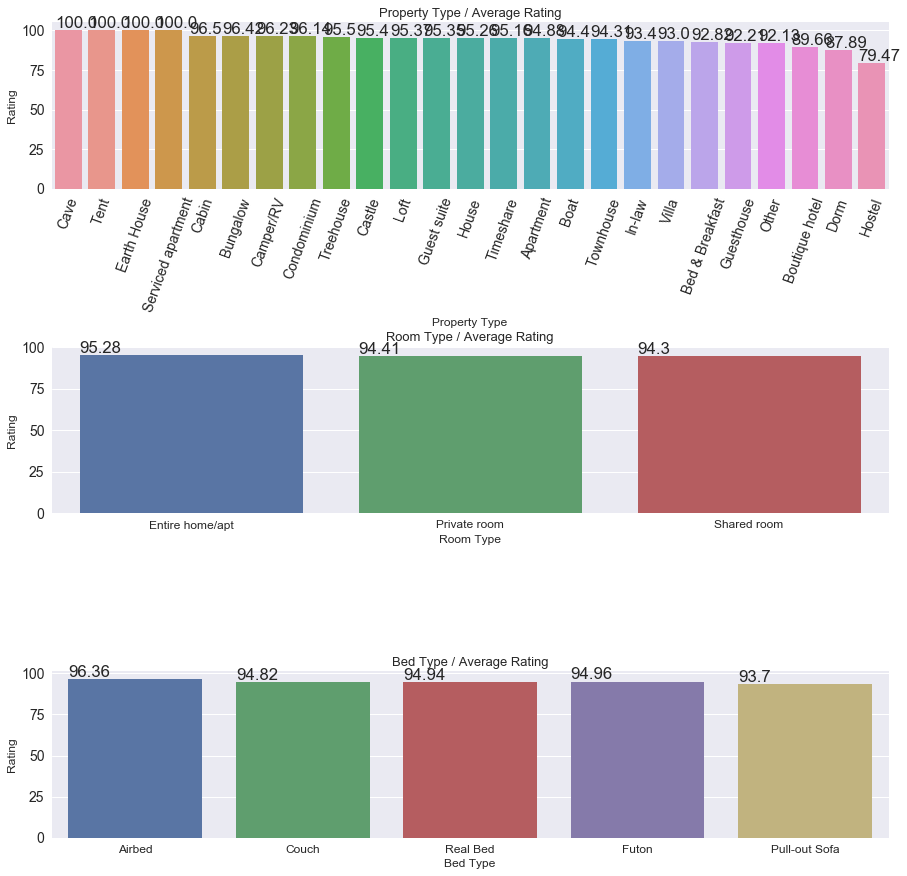

In [53]:
# Setting the figure size + space inbetween each subplot
fig = plt.figure(figsize=(15,15))
_ = fig.subplots_adjust(hspace=.95)

#Property Type
_ = plt.subplot(3,1,1)
order_prop_price = listings.groupby(['property_type'])[['review_scores_rating']].mean().reset_index().sort_values(by='review_scores_rating',ascending=False)
g = sns.barplot(x='property_type',y='review_scores_rating', data=listings,ci=0, order=order_prop_price['property_type'])
_ = plt.xticks(rotation=70)
_ = plt.title('Property Type / Average Rating', fontsize=13)
_ = plt.ylabel('Rating', fontsize=12)
_ = plt.xlabel('Property Type', fontsize=12)
for p in g.patches:
    g.annotate(str(round(float(p.get_height()),2)), (p.get_x(), p.get_height() * 1.015))


# Room Type
_ = plt.subplot(3,1,2)
order_room_price = listings.groupby(['room_type'])[['review_scores_rating']].median().reset_index().sort_values(by='review_scores_rating',ascending=False)
g = sns.barplot(x='room_type',y='review_scores_rating', data=listings,ci=0, order=order_room_price['room_type'])
_ = plt.xticks(fontsize=12)
_ = plt.title('Room Type / Average Rating', fontsize=13)
_ = plt.ylabel('Rating', fontsize=12)
_ = plt.xlabel('Room Type', fontsize=12)
for p in g.patches:
    g.annotate(str(round(float(p.get_height()),2)), (p.get_x(), p.get_height() * 1.015))


# Bed Type
_ = plt.subplot(3,1,3)
order_bed_price = listings.groupby(['bed_type'])[['review_scores_rating']].median().reset_index().sort_values(by='review_scores_rating',ascending=False)
g = sns.barplot(x='bed_type',y='review_scores_rating', data=listings,ci=0, order=order_bed_price['bed_type'])
_ = plt.xticks(fontsize=12)
_ = plt.title('Bed Type / Average Rating', fontsize=13)
_ = plt.ylabel('Rating', fontsize=12)
_ = plt.xlabel('Bed Type', fontsize=12)
for p in g.patches:
    g.annotate(str(round(float(p.get_height()),2)), (p.get_x(), p.get_height() * 1.015))

8 of the top 10 rated propety types have less than 30 listings and 6 of those have less that 10 total listings. It seems that the unique listings tend to have higher ratings.

<a id='ibbtr_r'></a>
## Rating: Instant Bookable / Business Travel Ready
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Barplots

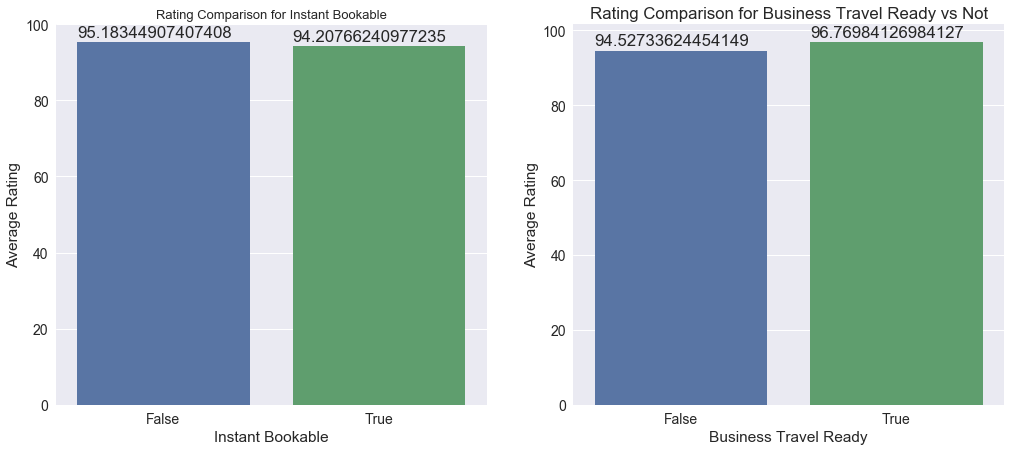

In [54]:
fiog = plt.figure(figsize=(17,7))
_ = plt.subplot(1,2,1) 
g = sns.barplot(x='instant_bookable',y='review_scores_rating',data=listings, ci=0)
_ = plt.xlabel('Instant Bookable')
_ = plt.ylabel('Average Rating')
_ = plt.title('Rating Comparison for Instant Bookable', fontsize=13)
for p in g.patches:
    g.annotate(str(float(p.get_height())), (p.get_x(), p.get_height() * 1.015))
_ = plt.subplot(1,2,2)    
g = sns.barplot(x='is_business_travel_ready',y='review_scores_rating',data=listings, ci=0)
_ = plt.xlabel('Business Travel Ready')
_ = plt.ylabel('Average Rating')
_ = plt.title('Rating Comparison for Business Travel Ready vs Not')
for p in g.patches:
    g.annotate(str(float(p.get_height())), (p.get_x(), p.get_height() * 1.015))

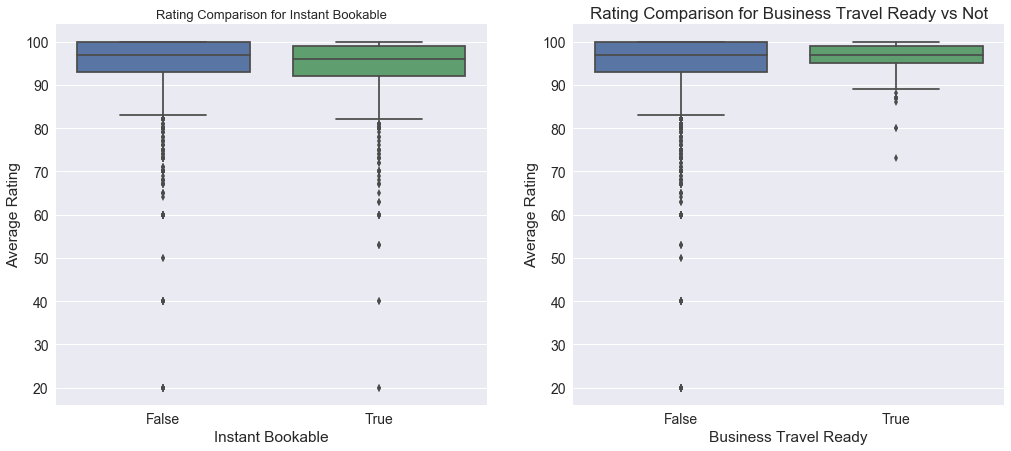

In [55]:
fiog = plt.figure(figsize=(17,7))
_ = plt.subplot(1,2,1) 
g = sns.boxplot(x='instant_bookable',y='review_scores_rating',data=listings)
_ = plt.xlabel('Instant Bookable')
_ = plt.ylabel('Average Rating')
_ = plt.title('Rating Comparison for Instant Bookable', fontsize=13)
for p in g.patches:
    g.annotate(str(float(p.get_height())), (p.get_x(), p.get_height() * 1.015))
_ = plt.subplot(1,2,2)    
g = sns.boxplot(x='is_business_travel_ready',y='review_scores_rating',data=listings)
_ = plt.xlabel('Business Travel Ready')
_ = plt.ylabel('Average Rating')
_ = plt.title('Rating Comparison for Business Travel Ready vs Not')
for p in g.patches:
    g.annotate(str(float(p.get_height())), (p.get_x(), p.get_height() * 1.015))

<a id='priceandrating'></a>
<center><h1>Price v. Rating </h1></center>

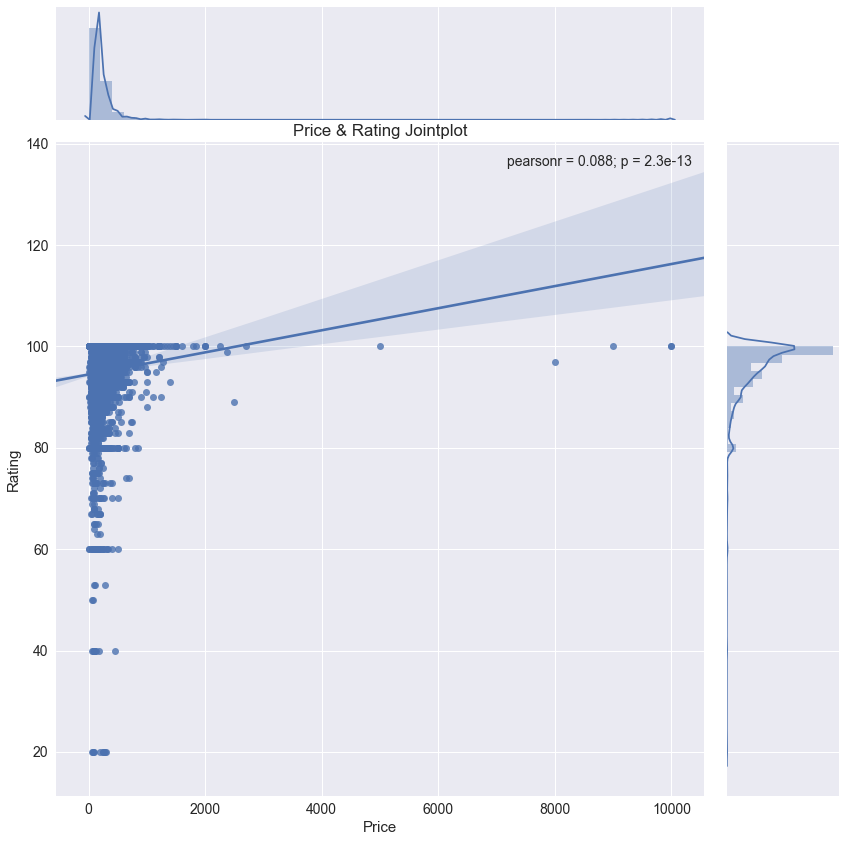

In [56]:
g = sns.jointplot('price','review_scores_rating',data=listings,kind='reg', size=12)
_ = plt.title('Price & Rating Jointplot')
_ = plt.ylabel('Rating', fontsize=15)
_ = plt.xlabel('Price', fontsize=15)

In [57]:
print('Correlation between Price and Rating: {}' .format(listings['price'].corr(listings['review_scores_rating'])))

Correlation between Price and Rating: 0.08757414256274089
